#limpeza e umas visualizações


In [ ]:
import pandas as pd


df = pd.read_csv('/content/dados_junglers_final.csv')

columns_to_drop = ['teamId', 'summoner1Id', 'summoner2Id', 'riotIdTagline', 'riotIdGameName']
df = df.drop(columns=columns_to_drop, errors='ignore')


df['gameLength'] = df['gameLength'] / 60
print(df.head())




   championName  deaths  kills  assists  champExperience  totalDamageDealt  \
0         Amumu       9      0        1             8973            127833   
1       Hecarim       1      9        9            14499            258803   
2  FiddleSticks       7      5        8            15211            232254   
3         Viego       5     10        5            18799            298871   
4        LeeSin       7      9        4            12317            197380   

   totalDamageDealtToChampions  totalDamageTaken  damageDealtToBuildings  \
0                         8568             28923                       0   
1                        15387             31434                    1954   
2                        19855             40493                       0   
3                        20779             41041                       0   
4                        19468             29317                     280   

   damageDealtToObjectives  ...  survivedThreeImmobilizesInFight  takedown

In [ ]:
# prompt: separe o df em 2, um só com win = True e um com win = False

df_win_true = df[df['win'] == True]
df_win_false = df[df['win'] == False]


<ipython-input-6-5f0d46bae742>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win_true['dano_por_duracao'] = df_win_true['totalDamageDealtToChampions'] / df_win_true['gameLength']


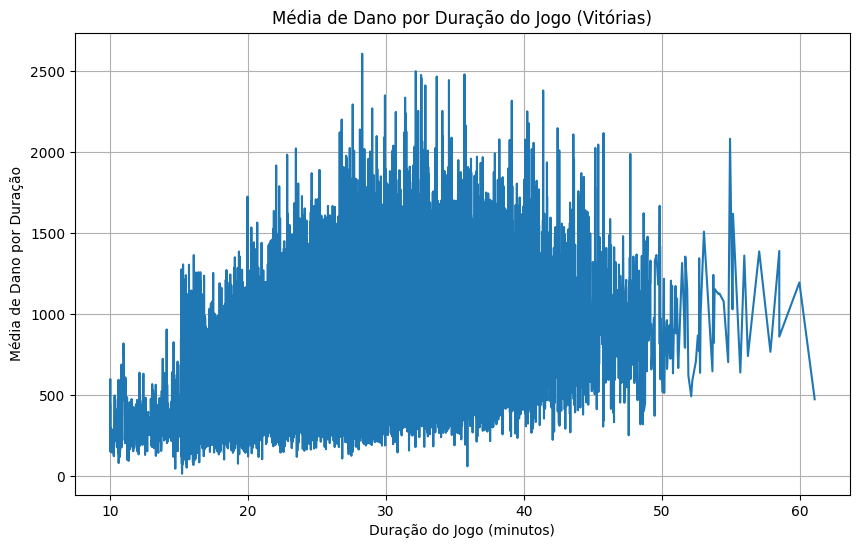

In [ ]:
# prompt: faça um grafico do df_win de totalDamageDealtToChampions por gameLenght (média de dano por duração) faça grafico de linha da média de dano por duração

import matplotlib.pyplot as plt

# Calcula a média de dano por duração do jogo para cada jogo
df_win_true['dano_por_duracao'] = df_win_true['totalDamageDealtToChampions'] / df_win_true['gameLength']

# Agrupa os dados pela duração do jogo e calcula a média do dano por duração
media_dano_por_duracao = df_win_true.groupby('gameLength')['dano_por_duracao'].mean()

# Plota o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(media_dano_por_duracao.index, media_dano_por_duracao.values)
plt.xlabel('Duração do Jogo (minutos)')
plt.ylabel('Média de Dano por Duração')
plt.title('Média de Dano por Duração do Jogo (Vitórias)')
plt.grid(True)
plt.show()


<ipython-input-8-60807cdf119e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win_true['dano_por_duracao'] = df_win_true['totalDamageDealtToChampions'] / df_win_true['gameLength']
<ipython-input-8-60807cdf119e>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='gameLength', y='dano_por_duracao', data=df_win_true, ci=None, label='Average Damage per Duration') # ci=None removes the confidence interval


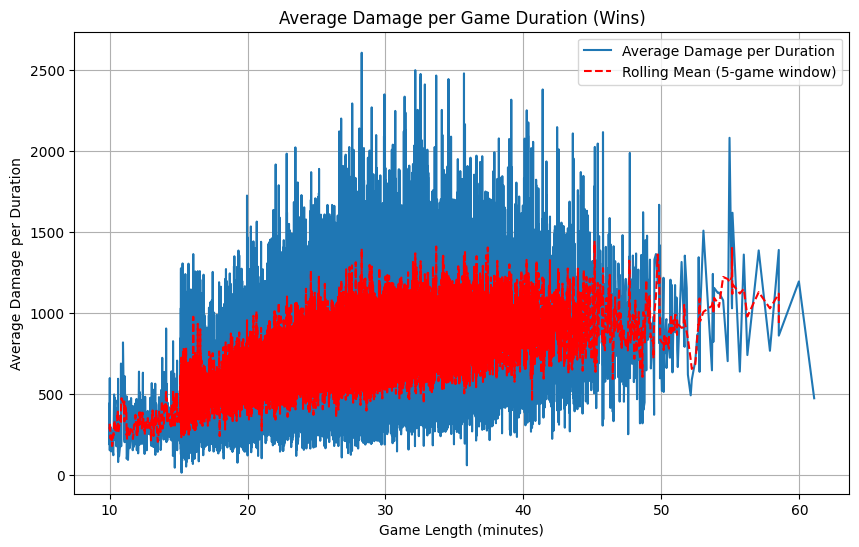

In [ ]:
# prompt: transforme um grafico do acima em um grafico suave e mostre a media por tempo

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code to read and process the dataframe) ...

# Calculate the average damage per game duration for each game
df_win_true['dano_por_duracao'] = df_win_true['totalDamageDealtToChampions'] / df_win_true['gameLength']

# Create a smoothed line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='gameLength', y='dano_por_duracao', data=df_win_true, ci=None, label='Average Damage per Duration') # ci=None removes the confidence interval

# Calculate and plot the rolling mean for a smoother curve
window_size = 5 # Adjust the window size as needed
rolling_mean = df_win_true.groupby('gameLength')['dano_por_duracao'].mean().rolling(window=window_size, center=True).mean()
plt.plot(rolling_mean.index, rolling_mean.values, label=f'Rolling Mean ({window_size}-game window)', color='red', linestyle='--')


plt.xlabel('Game Length (minutes)')
plt.ylabel('Average Damage per Duration')
plt.title('Average Damage per Game Duration (Wins)')
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-12-c673e7f5e43c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win_true['time_interval'] = pd.cut(df_win_true['gameLength'], bins=bins, labels=labels, right=False)
<ipython-input-12-c673e7f5e43c>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  damage_per_interval = df_win_true.groupby('time_interval')['totalDamageDealtToChampions'].mean() / df_win_true.groupby('time_interval')['gameLength'].mean()


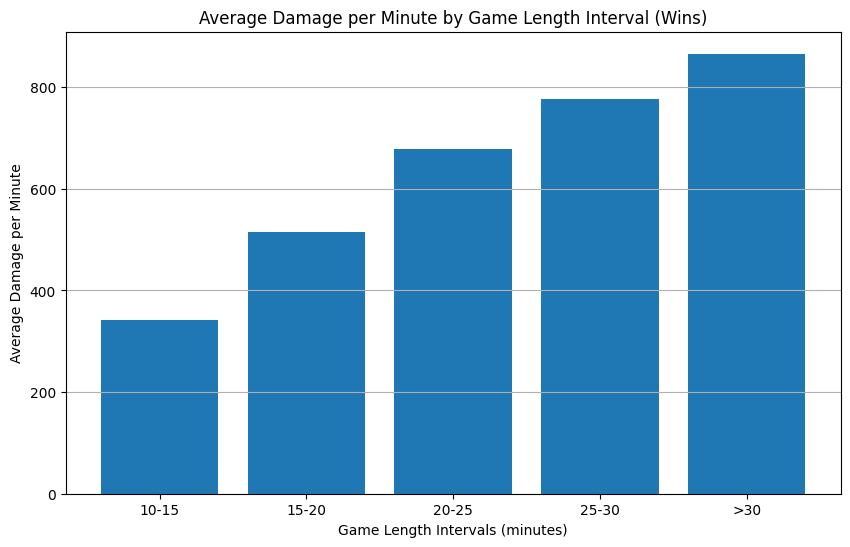

In [ ]:
# prompt: grafico de barras dos mesmos do damagePerMinute separando em 4 barras, até , entre 10 e 15 minutos entre 15 e 20 minutos, 25 e 30 minutos e mais de 30 minutos

import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code to read and process the dataframe) ...

# Define the time intervals
bins = [0, 10, 15, 20, 25, 30, float('inf')]
labels = ['0-10', '10-15', '15-20', '20-25', '25-30', '>30']

# Create a new column with the time interval
df_win_true['time_interval'] = pd.cut(df_win_true['gameLength'], bins=bins, labels=labels, right=False)

# Group by time interval and calculate the mean damage per minute
damage_per_interval = df_win_true.groupby('time_interval')['totalDamageDealtToChampions'].mean() / df_win_true.groupby('time_interval')['gameLength'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(damage_per_interval.index, damage_per_interval.values)
plt.xlabel('Game Length Intervals (minutes)')
plt.ylabel('Average Damage per Minute')
plt.title('Average Damage per Minute by Game Length Interval (Wins)')
plt.grid(axis='y')
plt.show()


<ipython-input-20-d618a6bc7f8d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win_true_filtered['time_interval'] = pd.cut(df_win_true_filtered['gameLength'], bins=bins, labels=labels, right=False)
<ipython-input-20-d618a6bc7f8d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win_false_filtered['time_interval'] = pd.cut(df_win_false_filtered['gameLength'], bins=bins, labels=labels, right=False)
<ipython-input-20-d618a6bc7f8d>:18: FutureWarning: The default of observed=False is deprecated and wil

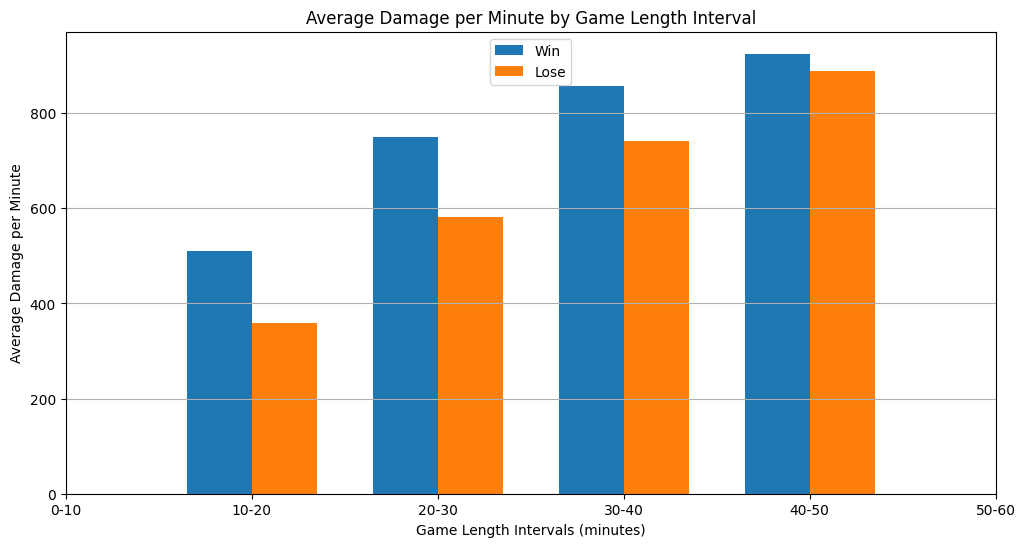

In [ ]:
# prompt: grafico de barras do damage per minute separado por intervalos de tempo comparando do df_win do df_win_false, faça bins separando ed 10 em 10 minutos até os 60 minutos e depois corte os dados de jogos com mais de 50 minutos

# ... (Your existing code) ...

# Define the time intervals (0-10, 10-20,... 50-60)
bins = range(0, 61, 10)
labels = [f'{i}-{i+10}' for i in bins[:-1]]

# Filter out games longer than 50 minutes
df_win_true_filtered = df_win_true[df_win_true['gameLength'] <= 50]
df_win_false_filtered = df_win_false[df_win_false['gameLength'] <= 50]

# Create the time interval column for both dataframes
df_win_true_filtered['time_interval'] = pd.cut(df_win_true_filtered['gameLength'], bins=bins, labels=labels, right=False)
df_win_false_filtered['time_interval'] = pd.cut(df_win_false_filtered['gameLength'], bins=bins, labels=labels, right=False)

# Calculate the average damage per minute for each interval and win condition
damage_per_interval_win = df_win_true_filtered.groupby('time_interval')['totalDamageDealtToChampions'].mean() / df_win_true_filtered.groupby('time_interval')['gameLength'].mean()
damage_per_interval_lose = df_win_false_filtered.groupby('time_interval')['totalDamageDealtToChampions'].mean() / df_win_false_filtered.groupby('time_interval')['gameLength'].mean()


# Create the grouped bar plot
x = range(len(labels))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, damage_per_interval_win, width, label='Win')
plt.bar([i + width for i in x], damage_per_interval_lose, width, label='Lose')


plt.xlabel('Game Length Intervals (minutes)')
plt.ylabel('Average Damage per Minute')
plt.title('Average Damage per Minute by Game Length Interval')
plt.xticks([i + width / 2 for i in x], labels)
plt.legend()
plt.grid(axis='y')
plt.show()


<ipython-input-21-d200ea8cc0f9>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  game_counts = df.groupby('time_interval')['gameLength'].count()


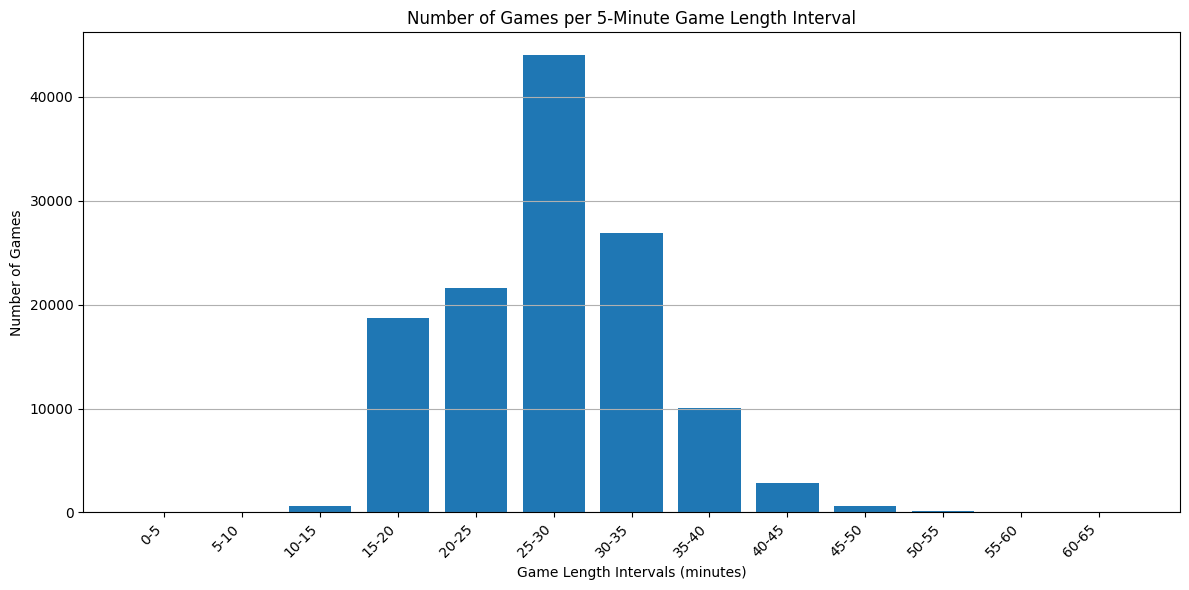

In [ ]:
# prompt: mostre quantos jogos tem de cada duração de 5 em minutos em bins por grafico de barras no df limpo total

# ... (Your existing code) ...

# Define bins for game duration in 5-minute intervals
bins = range(0, int(df['gameLength'].max()) + 5, 5)
labels = [f'{i}-{i+5}' for i in bins[:-1]]

# Create the time interval column
df['time_interval'] = pd.cut(df['gameLength'], bins=bins, labels=labels, right=False)

# Count the number of games in each time interval
game_counts = df.groupby('time_interval')['gameLength'].count()

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(game_counts.index, game_counts.values)
plt.xlabel('Game Length Intervals (minutes)')
plt.ylabel('Number of Games')
plt.title('Number of Games per 5-Minute Game Length Interval')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# prompt: limpe do df todas as partidas com menos de 15 minutos ou mais de 40 minutos

# ... (Your existing code) ...

# Filter out games shorter than 15 minutes or longer than 40 minutes
df = df[(df['gameLength'] >= 15) & (df['gameLength'] <= 40)]

# ... (Rest of your code) ...


In [ ]:
# prompt: salve o novo df como csv

# ... (Your existing code) ...

# Save the modified DataFrame to a CSV file
df.to_csv('modified_dados_junglers.csv', index=False)


#capitulo 2 checar o que normalizar e o que dividir

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error

def categorizar_tipo_crescimento(df, coluna_referencia='gameLength', limite_correlacao=0.4, margem_erro=0.05):
    # Seleciona colunas numéricas
    colunas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
    colunas_numericas = [col for col in colunas_numericas if col != coluna_referencia]

    resultados = {}

    for col in colunas_numericas:
        x = df[coluna_referencia]
        y = df[col]

        if y.isnull().all() or y.var() == 0:
            resultados[col] = {'Melhor_Modelo': 'Constante ou Nulo', 'Erro': None}
            continue

        # Linear
        slope_linear, intercept_linear, _, _, _ = linregress(x, y)
        y_pred_linear = slope_linear * x + intercept_linear
        erro_linear = mean_squared_error(y, y_pred_linear)

        # Logarítmico
        x_log = np.log(x + 1)
        slope_log, intercept_log, _, _, _ = linregress(x_log, y)
        y_pred_log = slope_log * x_log + intercept_log
        erro_log = mean_squared_error(y, y_pred_log)

        # Quadrático (polinomial de grau 2)
        coef_quad = np.polyfit(x, y, 2)
        y_pred_quad = np.polyval(coef_quad, x)
        erro_quad = mean_squared_error(y, y_pred_quad)

        erros = {'Linear': erro_linear, 'Logarítmico': erro_log, 'Quadrático': erro_quad}
        melhor_modelo = min(erros, key=erros.get)

        # Verificar se os erros são muito próximos
        erros_ordenados = sorted(erros.values())
        if len(erros_ordenados) >= 2 and abs(erros_ordenados[0] - erros_ordenados[1]) / erros_ordenados[0] < margem_erro:
            melhor_modelo = 'Indefinido'

        resultados[col] = {
            'Melhor_Modelo': melhor_modelo,
            'Erro_Linear': erro_linear,
            'Erro_Logaritmico': erro_log,
            'Erro_Quadratico': erro_quad
        }

    resultados_df = pd.DataFrame.from_dict(resultados, orient='index')
    return resultados_df

# Exemplo de uso:
# df = pd.read_csv('seu_arquivo.csv')
#
# print(resultados)


In [ ]:
# Exemplo de uso:
df = pd.read_csv('/content/modified_dados_junglers.csv')
df = df.dropna()
resultados = categorizar_tipo_crescimento(df)
df['win'] = df['win'].astype(int)

# Save the 'resultados' DataFrame to a CSV file
resultados.to_csv('crescimento_tipo.csv')
resultados.to_excel('crescimentos.xlsx', index=True)
resultados


,Melhor_Modelo,Erro_Linear,Erro_Logaritmico,Erro_Quadratico,Erro
deaths,Quadrático,5.038300e+00,4.493139e+00,3.238164e+00,NaN
kills,Indefinido,8.838523e+00,8.832405e+00,8.729662e+00,NaN
assists,Quadrático,1.243406e+01,1.203373e+01,9.378734e+00,NaN
champExperience,Indefinido,2.848490e+06,2.888384e+06,2.835139e+06,NaN
totalDamageDealt,Indefinido,2.401867e+09,2.339820e+09,2.314370e+09,NaN
...,...,...,...,...,...
teamBaronKills,Quadrático,5.458625e-02,5.875585e-02,2.521399e-02,NaN
teamDamagePercentage,Indefinido,4.310939e-03,4.395905e-03,4.188899e-03,NaN
teamRiftHeraldKills,Indefinido,1.381693e-01,1.410478e-01,1.344934e-01,NaN
turretTakedowns,Indefinido,2.033471e+00,2.033952e+00,2.027289e+00,NaN


In [ ]:
import pandas as pd
import numpy as np

# Carregar dados
df = pd.read_csv('modified_dados_junglers.csv')
crescimentos = pd.read_excel('crescimentos.xlsx')

# Criar um dicionário de {variável: tipo de crescimento}
crescimento_dict = dict(zip(crescimentos.index, crescimentos['Melhor_Modelo']))

# Aplicar correções linha a linha
for coluna, tipo in crescimento_dict.items():
    if coluna not in df.columns:
        continue  # Pular colunas que não existem
    if tipo == 'Quadrático':
        df[coluna] = df[coluna] / (df['gameLength'] ** 2)
    # Indefinido: não altera


columns_to_drop = ['gameEndedInEarlySurrender']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.to_csv('dados_junglers_corrigido.csv', index=False)
print('✅ Correções linha a linha aplicadas e arquivo salvo como dados_junglers_corrigido.csv')



✅ Correções linha a linha aplicadas e arquivo salvo como dados_junglers_corrigido.csv


In [ ]:
# prompt: # prompt: não assuma nada, importe pandas as pd pegue meu modified dados jungler do content, defina ele como df, separe esse df em 2 um onde win = true e  o outro onde win = false e depois tire as medias separadas por championName e salve
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# # Carregar dados
# df = pd.read_csv('modified_dados_junglers.csv')
# df_win_true = df[df['win'] == True].copy()
# df_win_false = df[df['win'] == False].copy()
# # Group data by 'championName' and calculate the mean of all columns for each group
# mean_df_win_true = df_win_true.groupby('championName').mean()
# mean_df_win_false = df_win_false.groupby('championName').mean()
# # Save the results to CSV files
# mean_df_win_true.to_csv('mean_win_true.csv')
# mean_df_win_false.to_csv('mean_win_false.csv')
# garanta que só variaveis numericas serão feitas de media

import pandas as pd

# Carregar dados
df = pd.read_csv('modified_dados_junglers.csv')

# Separar o DataFrame em dois: um com vitórias (win == True) e outro com derrotas (win == False)
df_win_true = df[df['win'] == True].copy()
df_win_false = df[df['win'] == False].copy()

# Selecionar apenas colunas numéricas para calcular a média
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove('win') # Remove 'win' column if present

# Calcular a média das colunas numéricas agrupadas por 'championName'
mean_df_win_true = df_win_true.groupby('championName')[numeric_cols].mean()
mean_df_win_false = df_win_false.groupby('championName')[numeric_cols].mean()

# Salvar os resultados em arquivos CSV
mean_df_win_true.to_csv('mean_win_true.csv')
mean_df_win_false.to_csv('mean_win_false.csv')


ValueError: list.remove(x): x not in list

In [ ]:
# prompt: read e depois mostre o modified dados jungler
df = pd.read_csv('modified_dados_junglers.csv')
# Display the modified dataframe
print(df.head())


   championName  deaths  kills  assists  champExperience  totalDamageDealt  \
0         Amumu       9      0        1             8973            127833   
1       Hecarim       1      9        9            14499            258803   
2  FiddleSticks       7      5        8            15211            232254   
3         Viego       5     10        5            18799            298871   
4        LeeSin       7      9        4            12317            197380   

   totalDamageDealtToChampions  totalDamageTaken  damageDealtToBuildings  \
0                         8568             28923                       0   
1                        15387             31434                    1954   
2                        19855             40493                       0   
3                        20779             41041                       0   
4                        19468             29317                     280   

   damageDealtToObjectives  ...  takedowns  takedownsBeforeJungleMinionSpa

<ipython-input-45-0087e02f1ac6>:2: DtypeWarning: Columns (74) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('modified_dados_junglers.csv')


In [ ]:
# prompt:  Carregar dados corrigidos, fazer a contagem por championName e mostrar quanto tem de cada um no df, apague todas as linhas em que o championName é de um championName que apareceu menos de 30 vezes
# Deixar salvo algumas colunas importantes que não podem ser clusterizadas, win, time_interval e gameLenght

import pandas as pd

# Load the dataframe
df = pd.read_csv('/content/dados_junglers_corrigido.csv')

# Count occurrences of each champion
champion_counts = df['championName'].value_counts()

# Identify champions with less than 30 occurrences
champions_to_remove = champion_counts[champion_counts < 500].index

# Remove rows where championName is in champions_to_remove
df = df[~df['championName'].isin(champions_to_remove)]

# Save important columns that should not be clustered
important_columns = ['win', 'time_interval', 'gameLength']
df_important = df[important_columns].copy()

# Save the filtered dataframe
df.to_csv('filtered_junglers_data.csv', index=False)

# Display champion counts after filtering
print(df['championName'].value_counts())


championName
Viego           8075
LeeSin          5820
Kayn            4869
Vi              4785
Naafiri         4756
XinZhao         3914
Hecarim         3778
Lillia          3696
Talon           3693
Khazix          3230
Gwen            3020
Ekko            2969
Shaco           2904
JarvanIV        2781
Graves          2720
MasterYi        2639
FiddleSticks    2373
Kindred         2359
Nocturne        2330
Zed             2277
Volibear        2242
Diana           2236
Udyr            2216
Karthus         2179
Zac             2098
Briar           2089
Nunu            2087
Nidalee         2037
MonkeyKing      2033
Pantheon        1963
Rengar          1935
Ivern           1821
Belveth         1748
Elise           1690
Zyra            1593
Rammus          1481
Sejuani         1257
Warwick         1252
RekSai          1238
Evelynn         1167
Amumu           1138
Skarner         1061
Shyvana         1050
Darius           955
Taliyah          868
Poppy            816
Brand            767


In [ ]:
# prompt: mostre o tamanho do df

df.shape


(117927, 75)

In [ ]:
# prompt: Separar o df em 2:
# de um lado só com as linhas em que win = True e nos outros onde win = False
# transformar as colunas
# firstBloodAssist
# firstBloodKill
# de bool para 0 ou 1 (1 = True 0 = False)
# fazer a media das variáveis numéricas apenas separado por championName
# Deixar salvo algumas colunas importantes que não podem ser clusterizadas, win, time_interval para colocar de novo depois no final junto do df_novo
# Fazer um df

# Convert boolean columns to 0 and 1
df['firstBloodAssist'] = df['firstBloodAssist'].astype(int)
df['firstBloodKill'] = df['firstBloodKill'].astype(int)

# Split the dataframe based on 'win' column
df_win_true = df[df['win'] == 1]
df_win_false = df[df['win'] == 0]

# Save important columns
important_columns = ['win', 'time_interval', 'gameLength']
df_important_true = df_win_true[important_columns].copy()
df_important_false = df_win_false[important_columns].copy()

# Group data by champion and calculate the mean of numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols = [col for col in numerical_cols if col not in important_columns + ['win']]

df_win_true_grouped = df_win_true.groupby('championName')[numerical_cols].mean()
df_win_false_grouped = df_win_false.groupby('championName')[numerical_cols].mean()


# Concatenate the grouped dataframes if needed
# df_new = pd.concat([df_win_true_grouped, df_win_false_grouped], keys=['win=True', 'win=False'])

# Reset index to make 'championName' a regular column
df_win_true_grouped = df_win_true_grouped.reset_index()
df_win_false_grouped = df_win_false_grouped.reset_index()


# Now you have two dataframes:
# df_win_true_grouped:  Mean of numerical features for champions where win=True
# df_win_false_grouped: Mean of numerical features for champions where win=False
# df_important_true and df_important_false : Important columns for win = True and win = False
# You can proceed with further analysis or clustering on these dataframes.


In [ ]:
# prompt: save df_win_true_grouped e o false

# Save the dataframes to CSV files
df_win_true_grouped.to_csv('df_win_true_grouped.csv', index=False)
df_win_false_grouped.to_csv('df_win_false_grouped.csv', index=False)


print("DataFrames saved to CSV files successfully.")


DataFrames saved to CSV files successfully.


In [ ]:
import pandas as pd
import numpy as np


# Function to fill NaN values with the mean of other championNames for a given dataframe
def fill_nan_with_mean(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    for col in numerical_cols:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].mean())
    return df

# Apply the function to both dataframes
df_win_true_grouped = fill_nan_with_mean(df_win_true_grouped)
df_win_false_grouped = fill_nan_with_mean(df_win_false_grouped)

# Save the updated dataframes (optional)
df_win_true_grouped.to_csv('df_win_true_grouped_filled.csv', index=False)
df_win_false_grouped.to_csv('df_win_false_grouped_filled.csv', index=False)

print("NaN values filled with mean and dataframes saved.")


NaN values filled with mean and dataframes saved.


In [ ]:
# prompt: faça a normalização das variaveis numericas de df_win_true_group_filled e do false tambem faça tudo para os dois

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataframes
df_win_true_grouped_filled = pd.read_csv('df_win_true_grouped_filled.csv')
df_win_false_grouped_filled = pd.read_csv('df_win_false_grouped_filled.csv')

# Define a function to normalize numerical features
def normalize_numerical_features(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    scaler = MinMaxScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

# Normalize the numerical features for both dataframes
df_win_true_normalized = normalize_numerical_features(df_win_true_grouped_filled.copy())
df_win_false_normalized = normalize_numerical_features(df_win_false_grouped_filled.copy())

# Save the normalized dataframes (optional)
df_win_true_normalized.to_csv('df_win_true_normalized.csv', index=False)
df_win_false_normalized.to_csv('df_win_false_normalized.csv', index=False)

print("DataFrames normalized and saved.")


DataFrames normalized and saved.


#mais limpeza

In [ ]:
import pandas as pd

# Carregar os dois DataFrames agrupados por campeão e win status
win_df = pd.read_csv('/content/df_win_true_normalized.csv')
lose_df = pd.read_csv('/content/df_win_false_normalized.csv')

# Filtrar para campeões presentes em ambos
common_champs = set(win_df['championName']).intersection(lose_df['championName'])
win_df = win_df[win_df['championName'].isin(common_champs)].set_index('championName')
lose_df = lose_df[lose_df['championName'].isin(common_champs)].set_index('championName')

# Identificar colunas numéricas comuns
numeric_cols = win_df.select_dtypes(include='number').columns.intersection(
    lose_df.select_dtypes(include='number').columns
)

# 1) Variância win vs lose por campeão
means = (win_df[numeric_cols] + lose_df[numeric_cols]) / 2
var_per_champ = ((win_df[numeric_cols] - means)**2 + (lose_df[numeric_cols] - means)**2) / 2

# Média da variância por feature
avg_var = var_per_champ.mean(axis=0).sort_values()

# 2) Variância entre campeões dentro de win e dentro de lose
win_var = win_df[numeric_cols].var(axis=0).sort_values()
lose_var = lose_df[numeric_cols].var(axis=0).sort_values()

# Exibir resultados
print("=== Variância média entre win e lose (por feature) ===")
print(avg_var)

print("\n=== Variância entre campeões no conjunto WIN ===")
print(win_var)

print("\n=== Variância entre campeões no conjunto LOSE ===")
print(lose_var)

=== Variância média entre win e lose (por feature) ===
landSkillShotsEarlyGame                   0.000021
totalTimeCCDealt                          0.000035
knockEnemyIntoTeamAndKill                 0.000058
visionScore                               0.000115
jungleCsBefore10Minutes                   0.000138
                                            ...   
junglerTakedownsNearDamagedEpicMonster    0.012503
teamBaronKills                            0.013298
baronTakedowns                            0.013578
survivedSingleDigitHpCount                0.022485
killsOnOtherLanesEarlyJungleAsLaner       0.065000
Length: 71, dtype: float64

=== Variância entre campeões no conjunto WIN ===
killsOnOtherLanesEarlyJungleAsLaner       0.000000
visionScore                               0.019221
wardsPlaced                               0.022458
totalDamageTaken                          0.024412
quadraKills                               0.024657
                                            ...   
j

#Clusterização

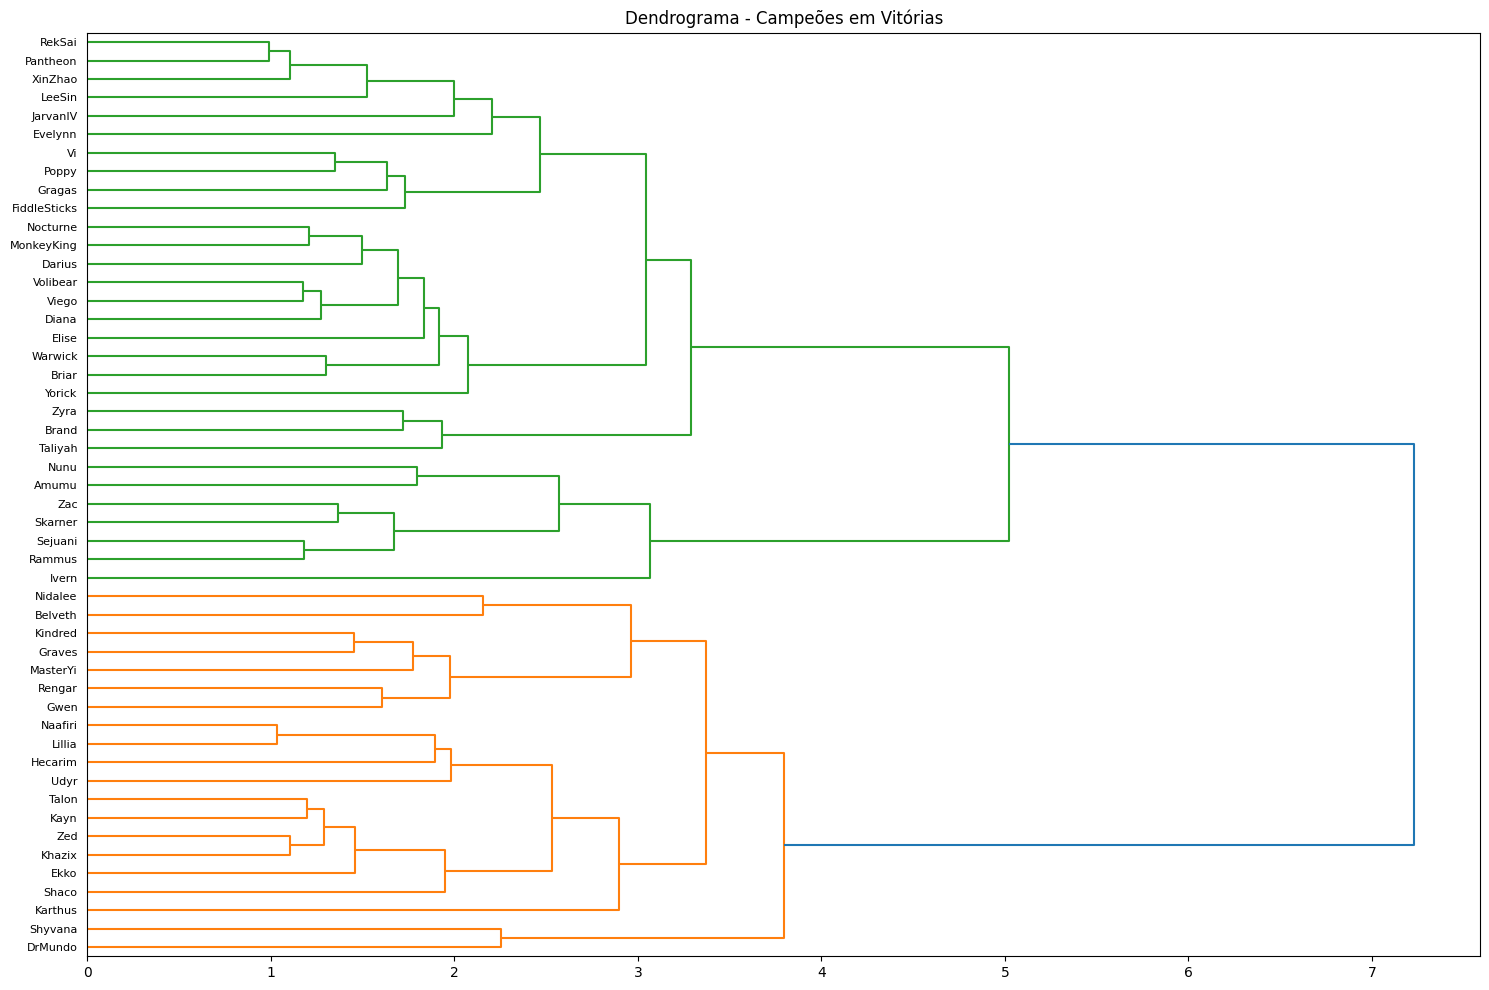

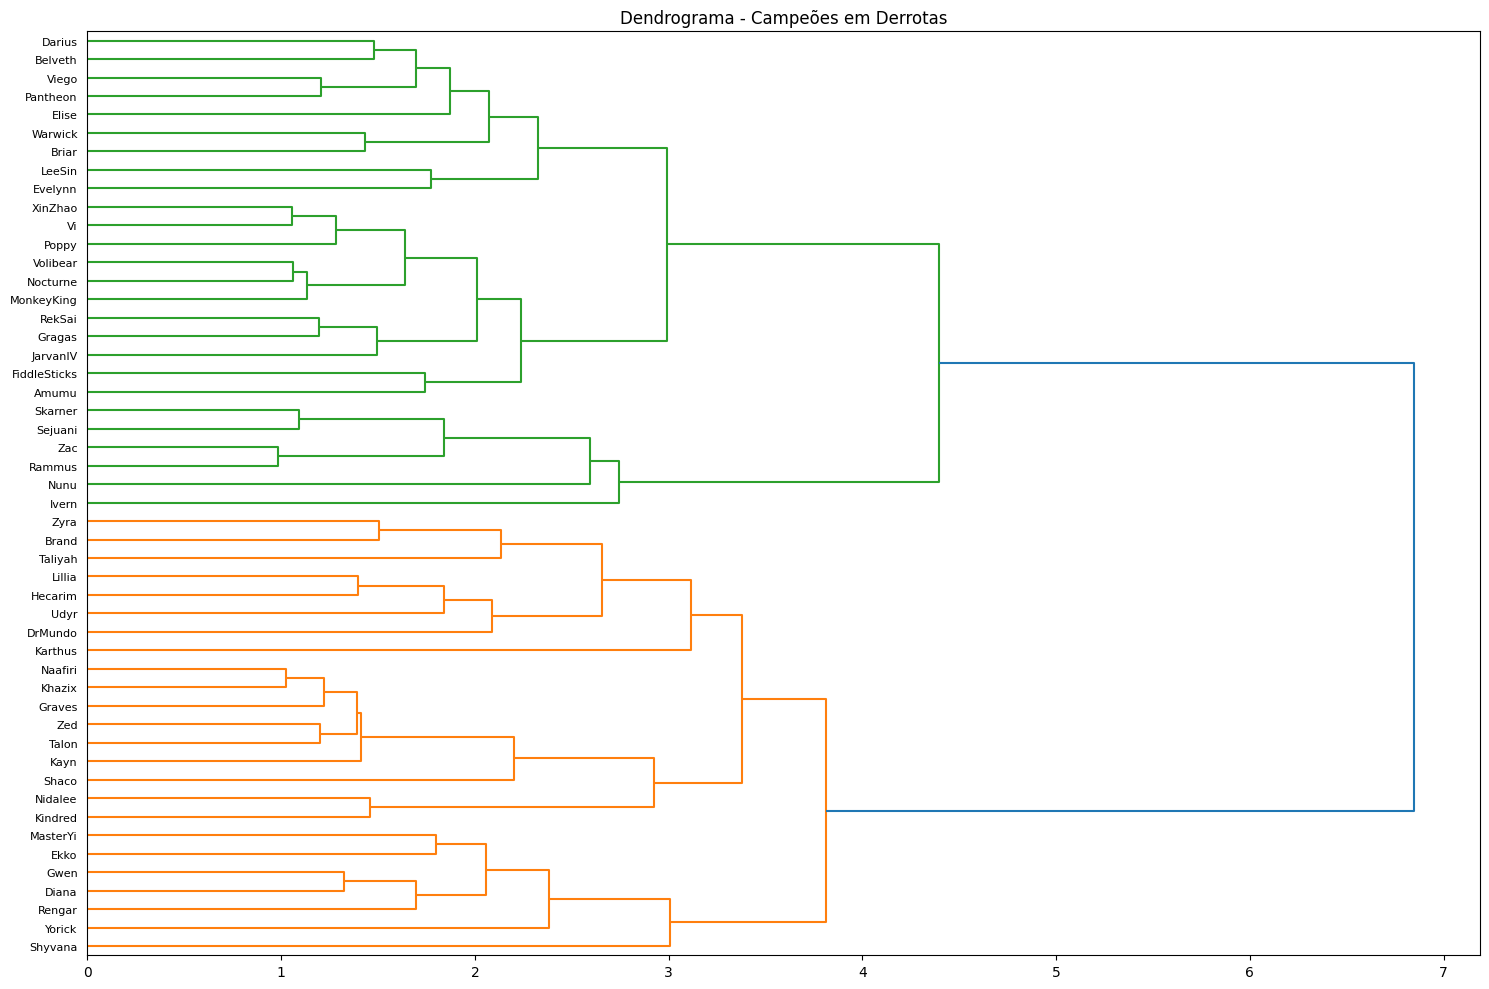

Clusterização finalizada e arquivos salvos!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Variáveis relevantes
variaveis_relevantes = [
    'baronKills', 'bountyLevel', 'champExperience', 'damageDealtToBuildings',
    'damageDealtToObjectives', 'deaths', 'goldEarned',
    'kills', 'longestTimeSpentLiving', 'objectivesStolen', 'quadraKills', 'teamBaronKills',
    'teamDamagePercentage', 'teamRiftHeraldKills', 'totalAllyJungleMinionsKilled',
    'totalDamageDealt', 'totalDamageDealtToChampions', 'totalDamageTaken',
    'totalEnemyJungleMinionsKilled', 'totalHealsOnTeammates', 'totalTimeCCDealt',
    'totalTimeSpentDead', 'turretKills', 'visionScore', 'wardsKilled', 'wardsPlaced',
    'alliedJungleMonsterKills', 'baronTakedowns', 'controlWardsPlaced', 'damagePerMinute',
    'dragonTakedowns', 'earlyLaningPhaseGoldExpAdvantage', 'enemyChampionImmobilizations',
    'enemyJungleMonsterKills', 'epicMonsterKillsNearEnemyJungler',
    'epicMonsterKillsWithin30SecondsOfSpawn', 'epicMonsterSteals',
    'goldPerMinute', 'immobilizeAndKillWithAlly', 'initialBuffCount', 'initialCrabCount',
    'jungleCsBefore10Minutes', 'junglerTakedownsNearDamagedEpicMonster', 'kda',
    'killAfterHiddenWithAlly', 'killParticipation', 'killsNearEnemyTurret',
    'killsOnOtherLanesEarlyJungleAsLaner', 'killsUnderOwnTurret', 'landSkillShotsEarlyGame',
    'laningPhaseGoldExpAdvantage', 'riftHeraldTakedowns', 'soloKills',
    'survivedSingleDigitHpCount', 'survivedThreeImmobilizesInFight', 'takedowns',
    'takedownsBeforeJungleMinionSpawn', 'takedownsInAlcove', 'turretTakedowns',
    'voidMonsterKill'
]

# Carregar os DataFrames
win_df = pd.read_csv('/content/df_win_true_normalized.csv')
lose_df = pd.read_csv('/content/df_win_false_normalized.csv')

# Filtrar as variáveis relevantes
win_df_filtered = win_df[variaveis_relevantes]
lose_df_filtered = lose_df[variaveis_relevantes]

# Clusterização hierárquica - Ward linkage
linked_win = linkage(win_df_filtered, method='ward')
linked_lose = linkage(lose_df_filtered, method='ward')

# Plotar dendrograma para vitórias (horizontal)
plt.figure(figsize=(15, 10))
plt.title('Dendrograma - Campeões em Vitórias')
dendrogram(linked_win, labels=win_df['championName'].values, leaf_rotation=0, orientation='right')
plt.tight_layout()
plt.show()

# Plotar dendrograma para derrotas (horizontal)
plt.figure(figsize=(15, 10))
plt.title('Dendrograma - Campeões em Derrotas')
dendrogram(linked_lose, labels=lose_df['championName'].values, leaf_rotation=0, orientation='right')
plt.tight_layout()
plt.show()

# Definir 5 clusters
win_clusters = fcluster(linked_win, 13, criterion='maxclust')
lose_clusters = fcluster(linked_lose, 15, criterion='maxclust')

# Adicionar clusters ao DataFrame original
win_df['cluster'] = win_clusters
lose_df['cluster'] = lose_clusters

# Salvar os novos DataFrames
win_df.to_csv('win_true_cluster.csv', index=False)
lose_df.to_csv('win_false_cluster.csv', index=False)

print("Clusterização finalizada e arquivos salvos!")


=== Campeões no Cluster 1 ===
['DrMundo', 'Shyvana']

=== Atributos Mais Impactantes - Cluster 1 ===
dragonTakedowns                           0.515886
objectivesStolen                          0.486003
epicMonsterSteals                         0.476325
epicMonsterKillsNearEnemyJungler          0.456807
initialCrabCount                          0.431073
jungleCsBefore10Minutes                   0.383173
epicMonsterKillsWithin30SecondsOfSpawn    0.372616
totalAllyJungleMinionsKilled              0.361891
totalDamageTaken                          0.340383
alliedJungleMonsterKills                  0.340046
damageDealtToObjectives                   0.314194
champExperience                           0.311149
totalDamageDealt                          0.295171
turretKills                               0.265134
inhibitorKills                            0.232203
damageDealtToBuildings                    0.229416
baronKills                                0.194182
baronTakedowns                 

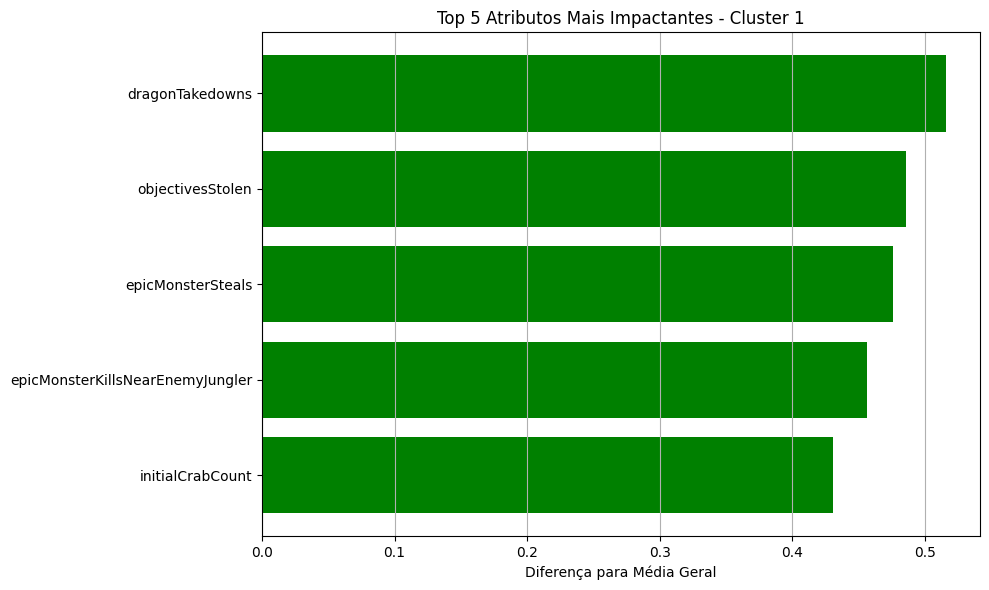

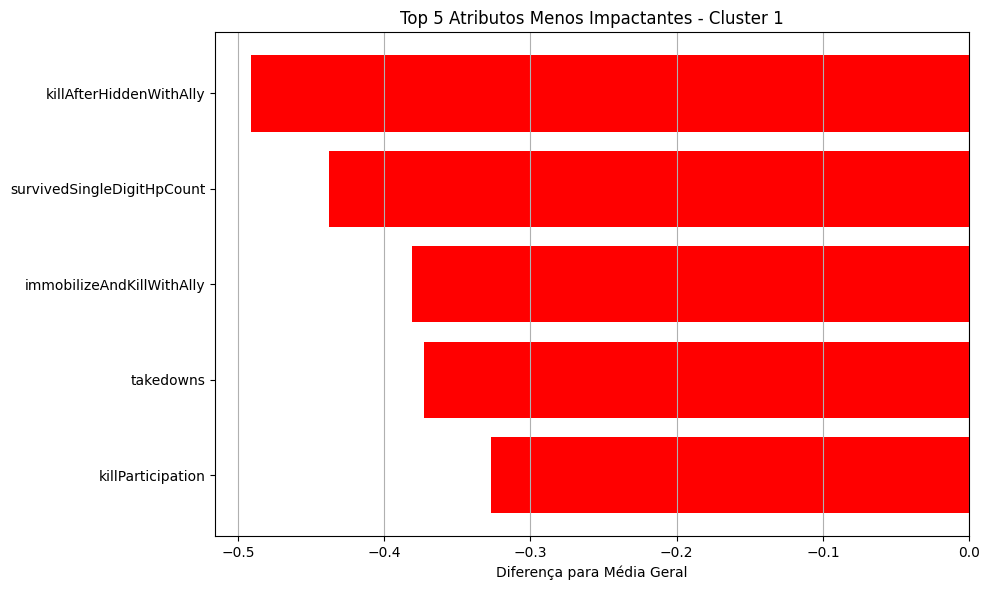


=== Campeões no Cluster 2 ===
['Ekko', 'Kayn', 'Khazix', 'Shaco', 'Talon', 'Zed']

=== Atributos Mais Impactantes - Cluster 2 ===
epicMonsterSteals                         0.295056
objectivesStolen                          0.293804
totalEnemyJungleMinionsKilled             0.268309
takedownsInAlcove                         0.262476
soloKills                                 0.249351
bountyLevel                               0.249282
kills                                     0.249096
largestKillingSpree                       0.243172
survivedSingleDigitHpCount                0.237314
goldSpent                                 0.225184
enemyJungleMonsterKills                   0.216467
firstBloodKill                            0.204332
champExperience                           0.201972
junglerTakedownsNearDamagedEpicMonster    0.200809
goldEarned                                0.188463
killsNearEnemyTurret                      0.183610
initialBuffCount                          0.182950
ea

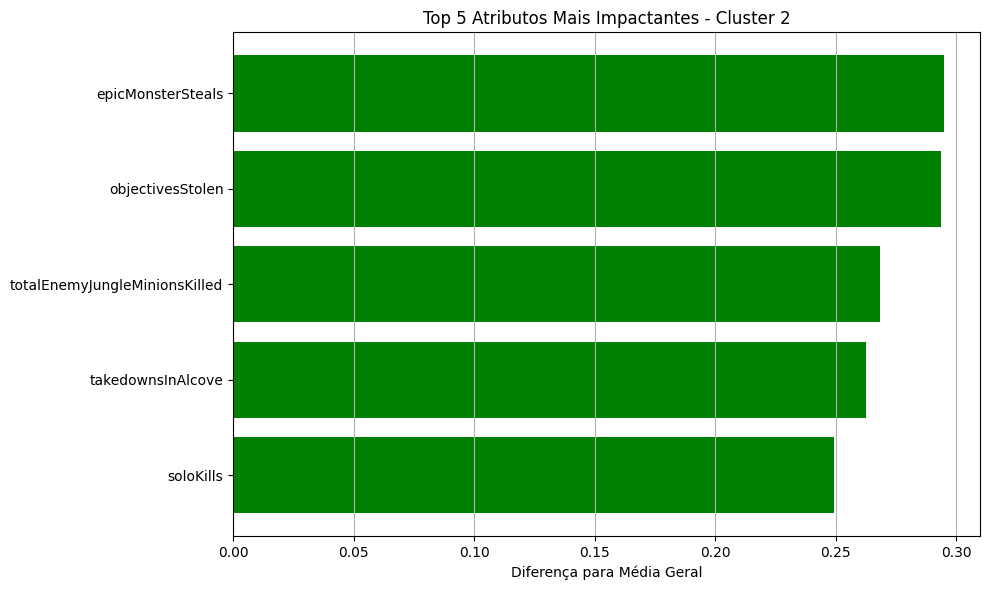

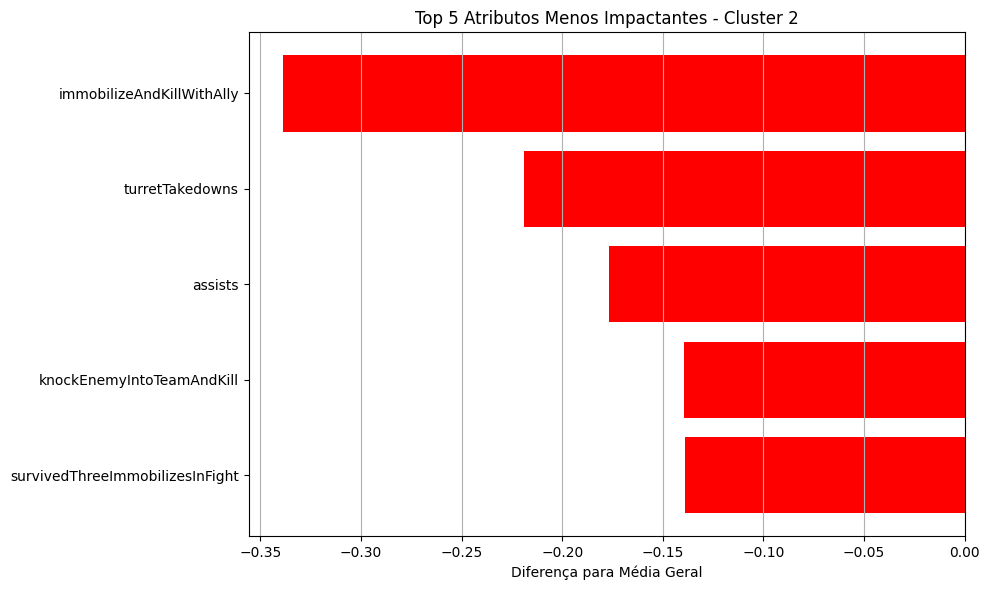


=== Campeões no Cluster 3 ===
['Hecarim', 'Lillia', 'Naafiri', 'Udyr']

=== Atributos Mais Impactantes - Cluster 3 ===
enemyJungleMonsterKills                   0.419964
earlyLaningPhaseGoldExpAdvantage          0.364622
totalEnemyJungleMinionsKilled             0.331409
laningPhaseGoldExpAdvantage               0.276155
initialCrabCount                          0.254037
jungleCsBefore10Minutes                   0.237788
alliedJungleMonsterKills                  0.188758
voidMonsterKill                           0.168726
totalAllyJungleMinionsKilled              0.165188
survivedSingleDigitHpCount                0.160173
survivedThreeImmobilizesInFight           0.155673
totalTimeCCDealt                          0.149791
goldPerMinute                             0.146969
totalDamageDealt                          0.146437
champExperience                           0.115583
junglerTakedownsNearDamagedEpicMonster    0.109908
kda                                       0.103977
takedownsInAl

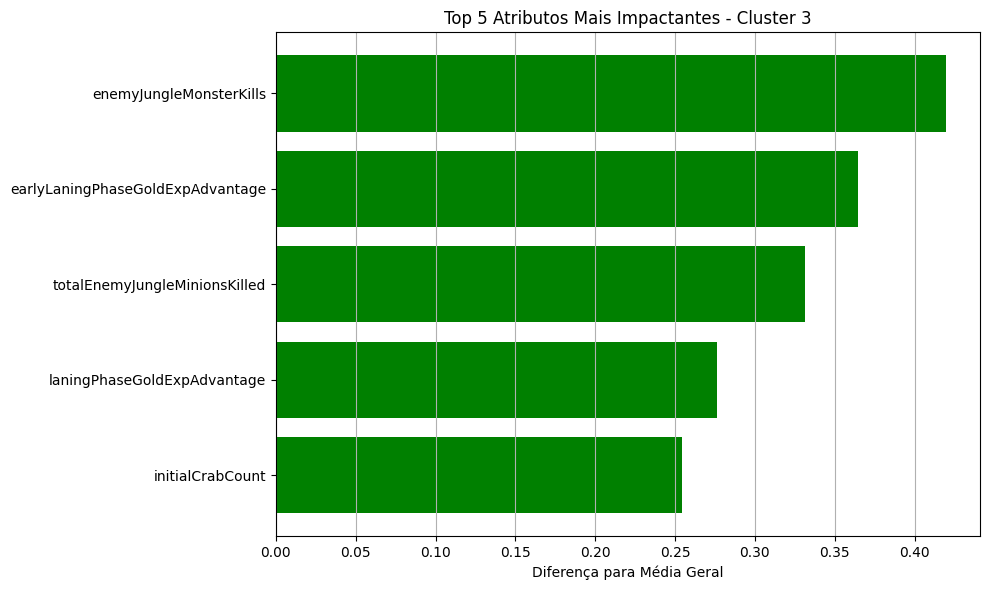

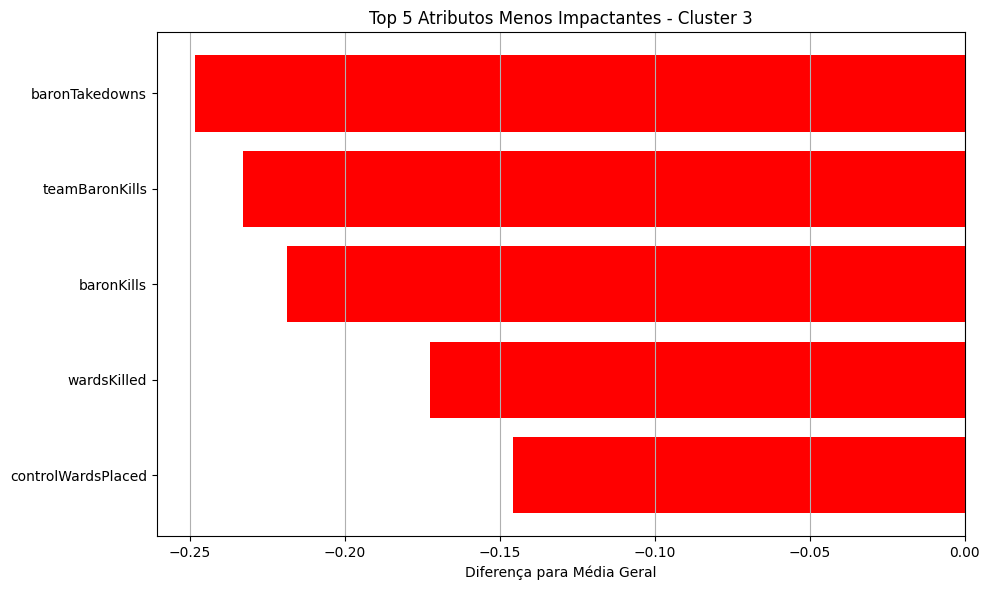


=== Campeões no Cluster 4 ===
['Karthus']

=== Atributos Mais Impactantes - Cluster 4 ===
killsUnderOwnTurret                       0.701883
laningPhaseGoldExpAdvantage               0.654780
earlyLaningPhaseGoldExpAdvantage          0.586329
deaths                                    0.575515
totalTimeSpentDead                        0.573713
totalDamageDealtToChampions               0.540820
damagePerMinute                           0.537976
teamDamagePercentage                      0.486967
goldSpent                                 0.455322
champExperience                           0.430902
goldPerMinute                             0.420259
takedowns                                 0.401742
jungleCsBefore10Minutes                   0.388364
totalDamageDealt                          0.380834
takedownsBeforeJungleMinionSpawn          0.370537
goldEarned                                0.368403
totalAllyJungleMinionsKilled              0.352896
alliedJungleMonsterKills                  

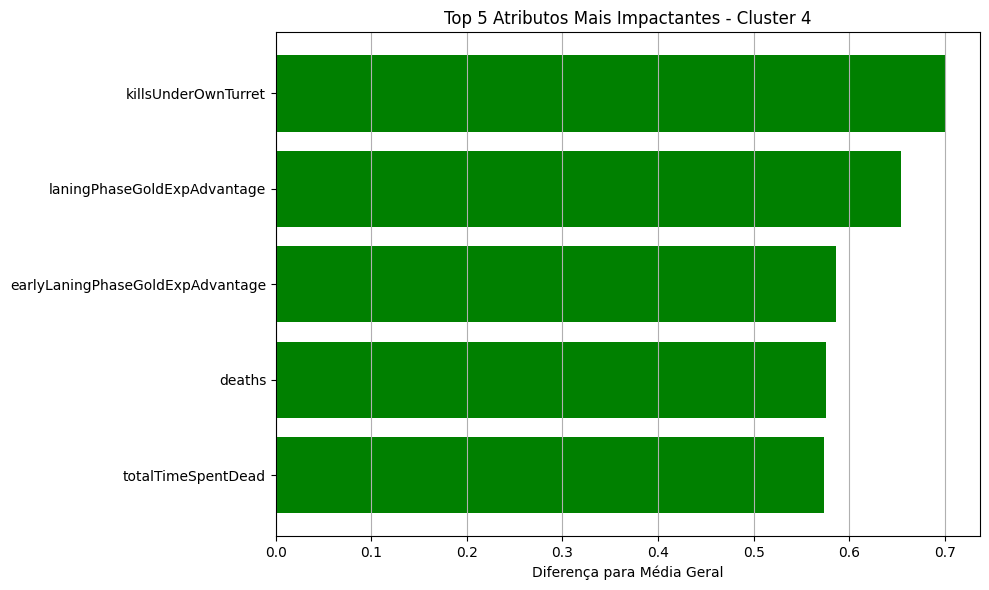

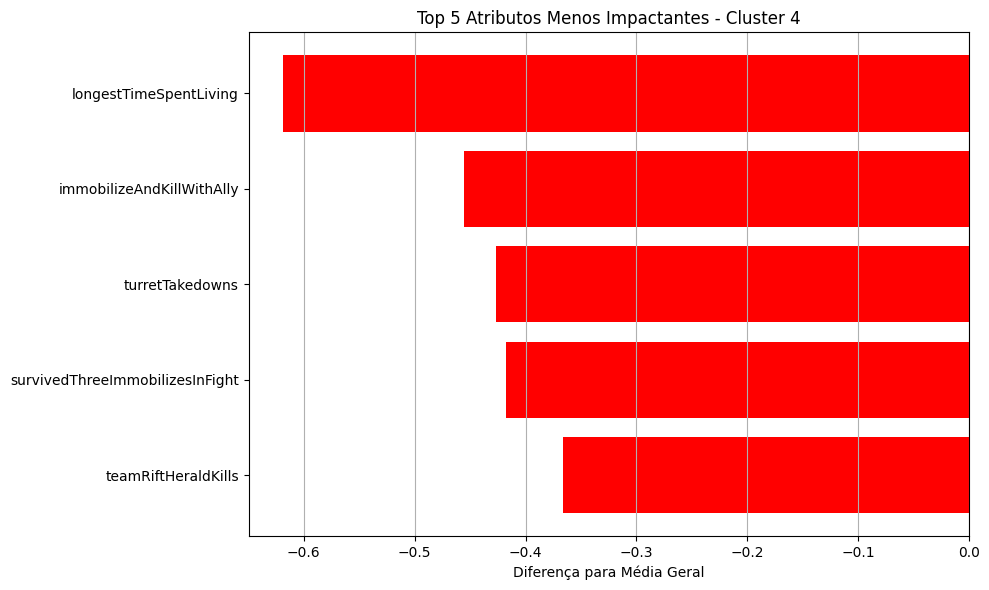


=== Campeões no Cluster 5 ===
['Graves', 'Gwen', 'Kindred', 'MasterYi', 'Rengar']

=== Atributos Mais Impactantes - Cluster 5 ===
turretKills                               0.365670
damageDealtToBuildings                    0.344969
goldPerMinute                             0.341592
goldEarned                                0.321217
goldSpent                                 0.312677
inhibitorKills                            0.293980
doubleKills                               0.286570
tripleKills                               0.276500
bountyLevel                               0.265706
junglerTakedownsNearDamagedEpicMonster    0.264590
kills                                     0.264227
largestMultiKill                          0.263574
quadraKills                               0.255275
totalEnemyJungleMinionsKilled             0.225023
soloKills                                 0.224537
killsNearEnemyTurret                      0.219207
damageDealtToObjectives                   0.211984
ch

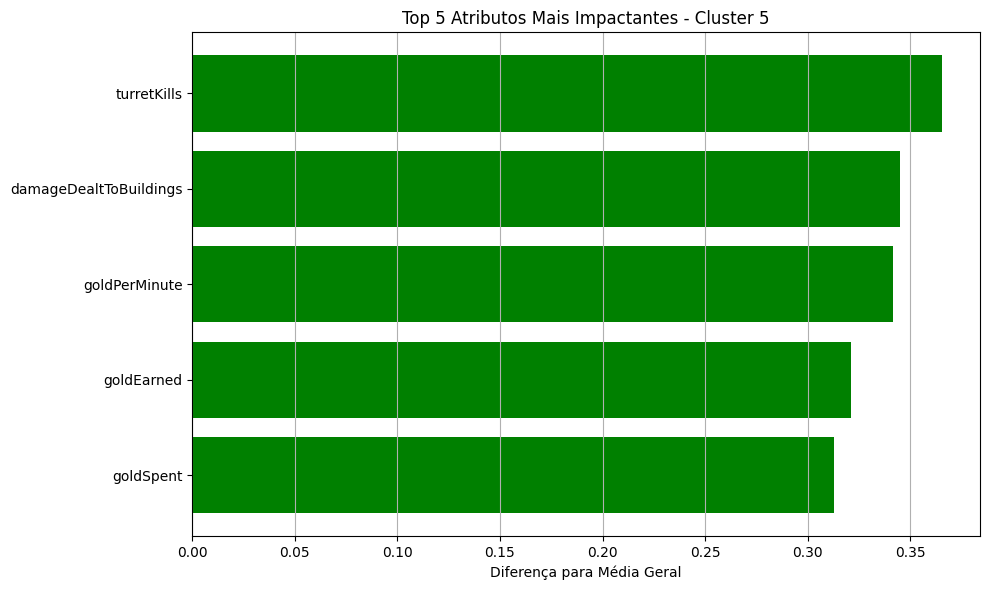

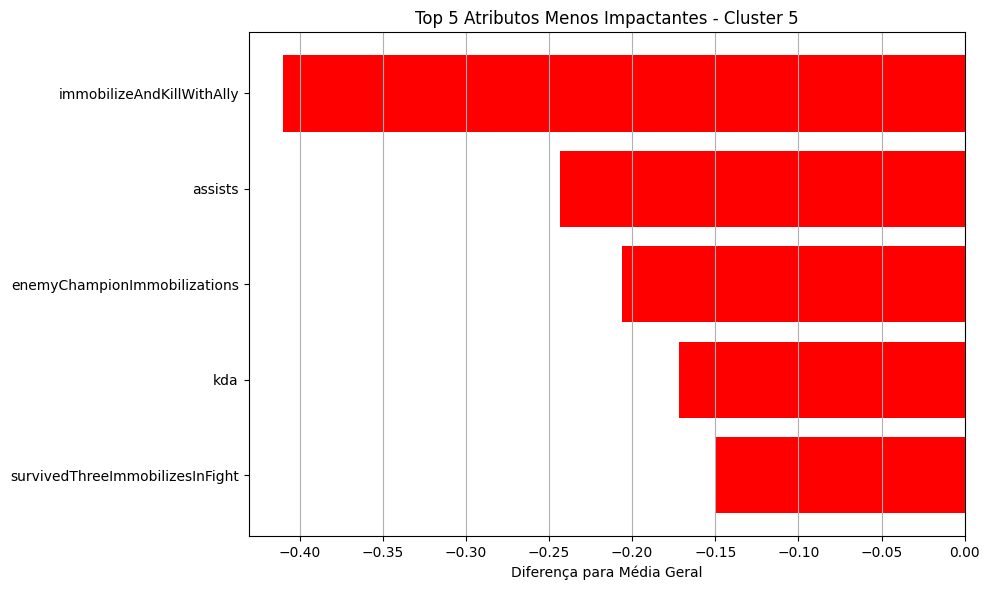


=== Campeões no Cluster 6 ===
['Belveth', 'Nidalee']

=== Atributos Mais Impactantes - Cluster 6 ===
totalHealsOnTeammates               0.452022
turretTakedowns                     0.442340
firstBloodKill                      0.433592
turretKills                         0.387913
takedownsBeforeJungleMinionSpawn    0.368687
riftHeraldTakedowns                 0.358020
voidMonsterKill                     0.352515
teamRiftHeraldKills                 0.343451
goldPerMinute                       0.314167
earlyLaningPhaseGoldExpAdvantage    0.308698
laningPhaseGoldExpAdvantage         0.280172
damageDealtToBuildings              0.249589
initialBuffCount                    0.226576
largestKillingSpree                 0.224632
kda                                 0.208363
wardsKilled                         0.205948
enemyJungleMonsterKills             0.204976
totalEnemyJungleMinionsKilled       0.202041
buffsStolen                         0.176487
killParticipation                   0.17032

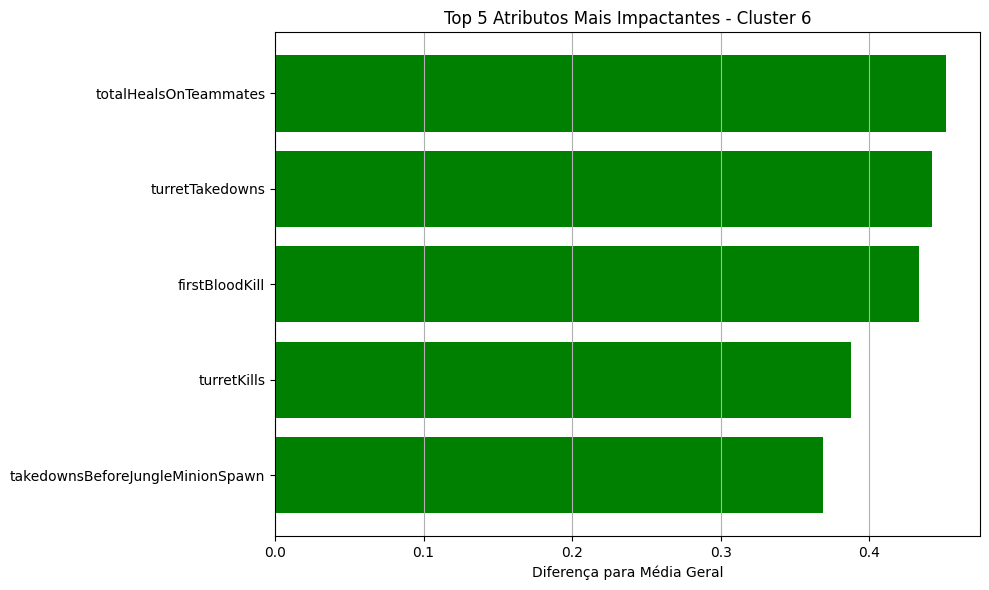

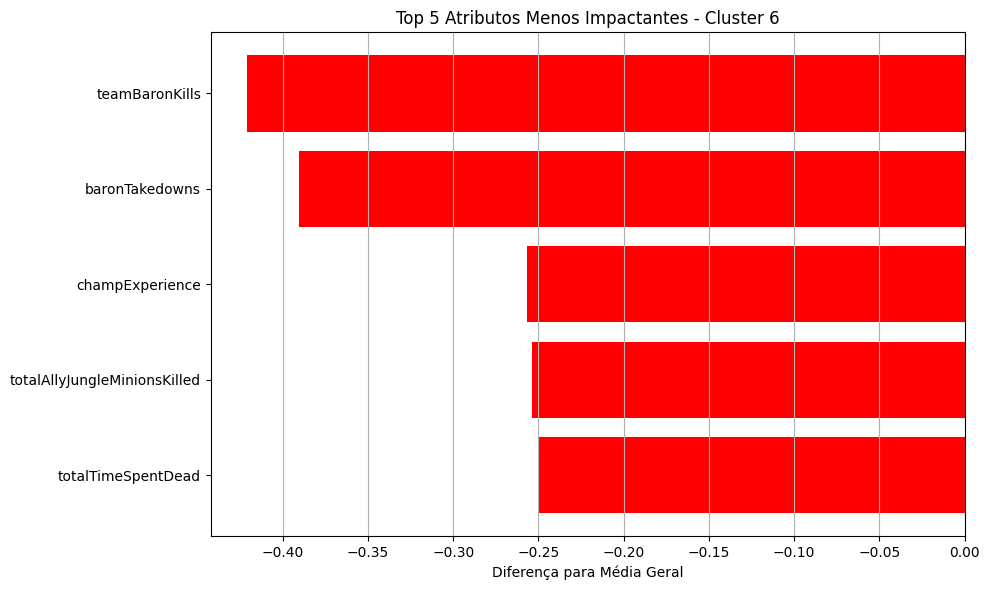


=== Campeões no Cluster 7 ===
['Rammus', 'Sejuani', 'Skarner', 'Zac']

=== Atributos Mais Impactantes - Cluster 7 ===
survivedThreeImmobilizesInFight    0.525212
immobilizeAndKillWithAlly          0.404700
enemyChampionImmobilizations       0.384285
assists                            0.364717
kda                                0.273051
knockEnemyIntoTeamAndKill          0.203902
takedowns                          0.172556
killParticipation                  0.143821
baronTakedowns                     0.108708
dtype: float64

=== Atributos Neutros - Cluster 7 ===
landSkillShotsEarlyGame               -0.093773
wardsKilled                           -0.092903
teamRiftHeraldKills                   -0.079846
dragonTakedowns                       -0.070927
visionScore                           -0.070861
riftHeraldTakedowns                   -0.063584
turretTakedowns                       -0.061525
wardsPlaced                           -0.045990
baronKills                            -0.016483

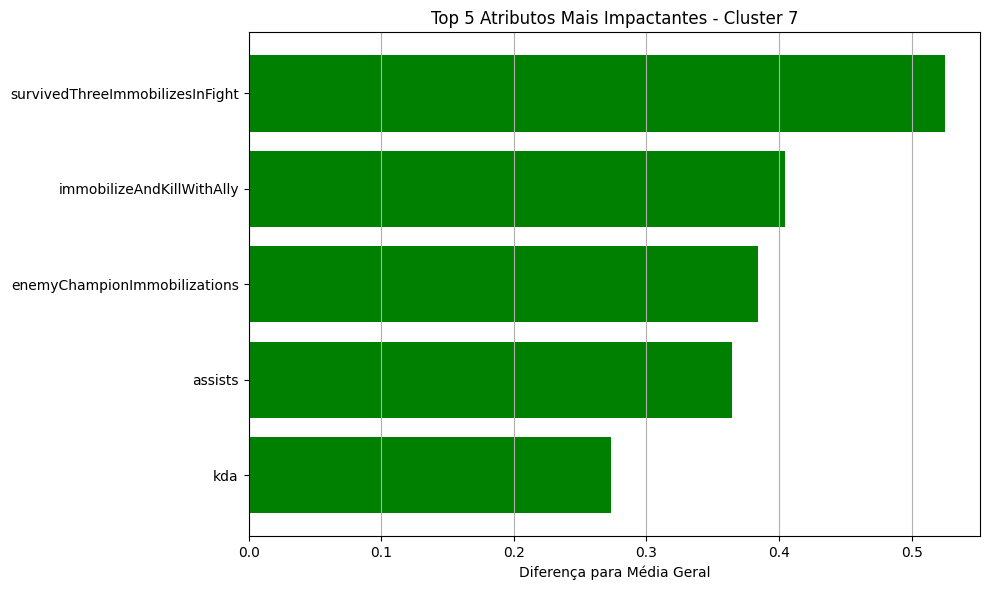

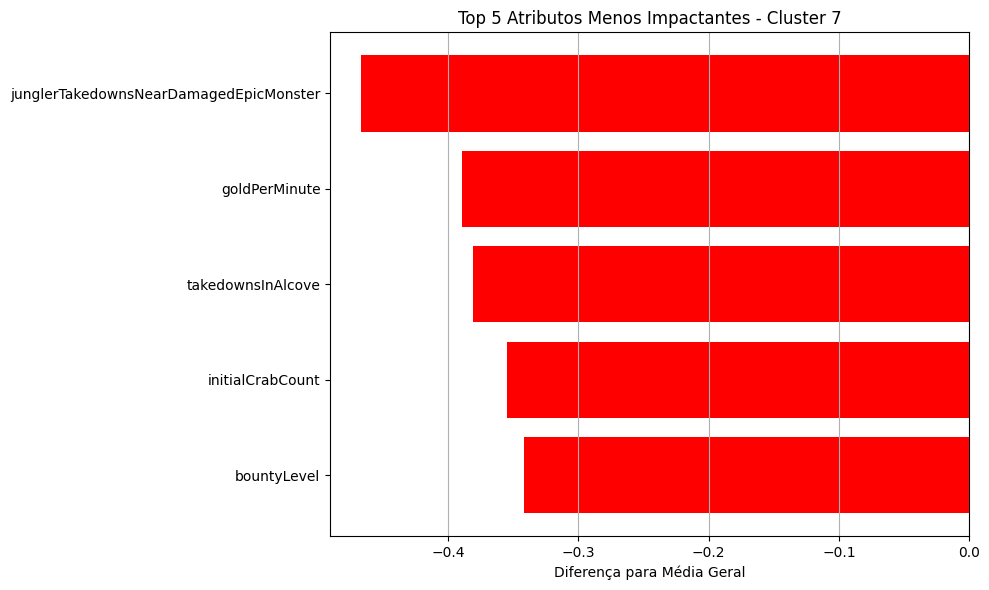


=== Campeões no Cluster 8 ===
['Amumu', 'Nunu']

=== Atributos Mais Impactantes - Cluster 8 ===
baronTakedowns                            0.527238
baronKills                                0.500907
teamBaronKills                            0.467675
landSkillShotsEarlyGame                   0.461125
epicMonsterKillsNearEnemyJungler          0.406948
immobilizeAndKillWithAlly                 0.341283
firstBloodAssist                          0.317561
assists                                   0.315479
dragonTakedowns                           0.261567
enemyChampionImmobilizations              0.226717
voidMonsterKill                           0.212685
epicMonsterKillsWithin30SecondsOfSpawn    0.196569
teamRiftHeraldKills                       0.196325
riftHeraldTakedowns                       0.175318
objectivesStolen                          0.141753
deaths                                    0.129204
survivedThreeImmobilizesInFight           0.128776
epicMonsterSteals                   

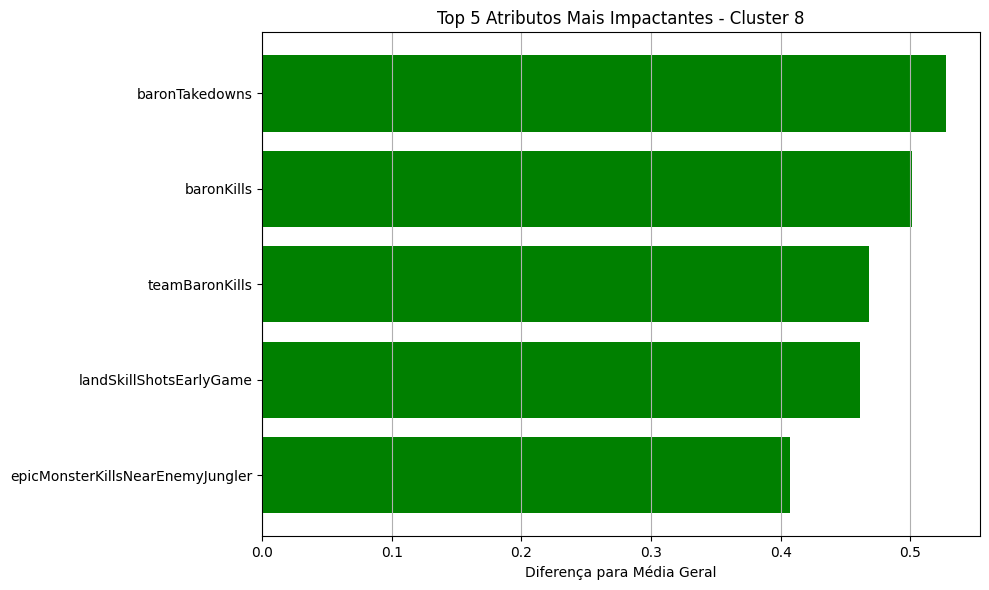

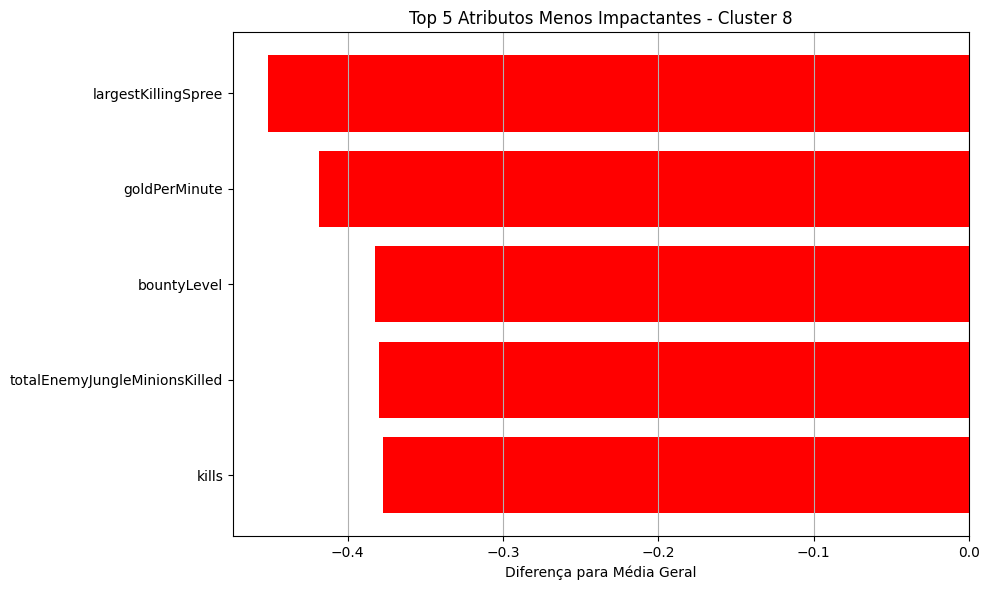


=== Campeões no Cluster 9 ===
['Ivern']

=== Atributos Mais Impactantes - Cluster 9 ===
kda                                 0.682370
assists                             0.656796
firstBloodAssist                    0.640930
killParticipation                   0.523109
turretTakedowns                     0.496037
initialBuffCount                    0.474831
killAfterHiddenWithAlly             0.468966
totalHealsOnTeammates               0.456191
controlWardsPlaced                  0.343120
takedowns                           0.307561
takedownsBeforeJungleMinionSpawn    0.305603
baronKills                          0.297471
longestTimeSpentLiving              0.283695
baronTakedowns                      0.271249
immobilizeAndKillWithAlly           0.215020
teamBaronKills                      0.214509
enemyChampionImmobilizations        0.163771
buffsStolen                         0.134136
wardsPlaced                         0.133045
wardsKilled                         0.121793
dtype: floa

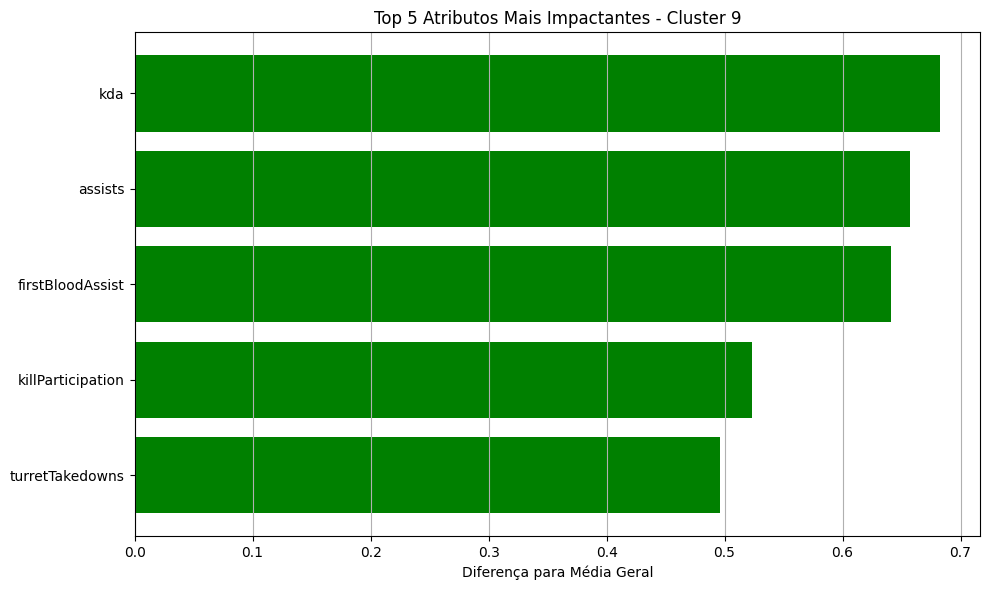

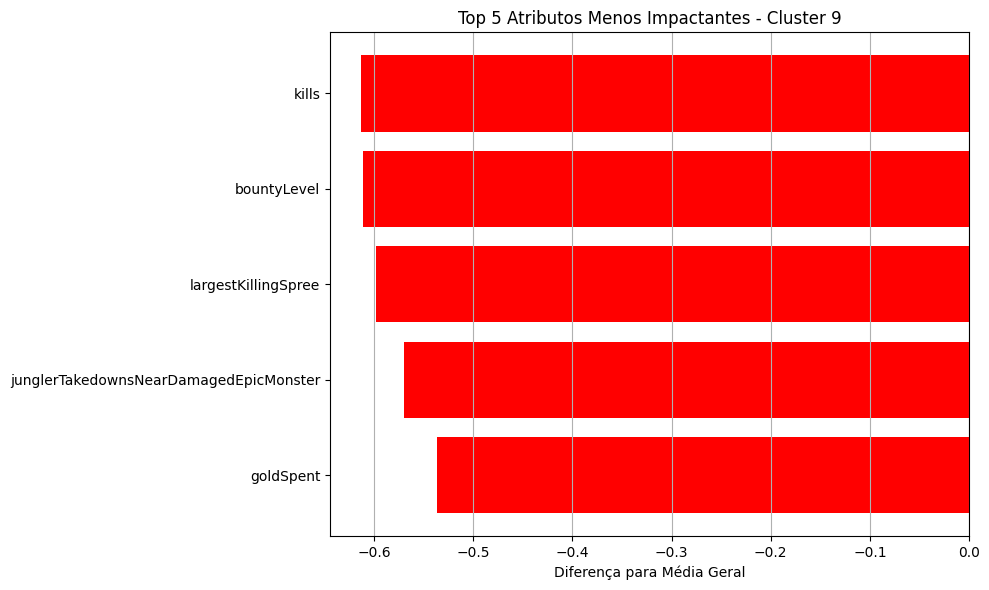


=== Campeões no Cluster 10 ===
['Brand', 'Taliyah', 'Zyra']

=== Atributos Mais Impactantes - Cluster 10 ===
alliedJungleMonsterKills                  0.319498
totalAllyJungleMinionsKilled              0.305674
landSkillShotsEarlyGame                   0.233365
enemyJungleMonsterKills                   0.213723
killAfterHiddenWithAlly                   0.209861
totalDamageDealt                          0.201763
jungleCsBefore10Minutes                   0.198604
takedownsBeforeJungleMinionSpawn          0.187914
voidMonsterKill                           0.173688
totalDamageDealtToChampions               0.171112
controlWardsPlaced                        0.170148
champExperience                           0.169136
damagePerMinute                           0.158185
teamDamagePercentage                      0.156079
killsUnderOwnTurret                       0.129422
epicMonsterKillsWithin30SecondsOfSpawn    0.116794
totalEnemyJungleMinionsKilled             0.115212
baronTakedowns         

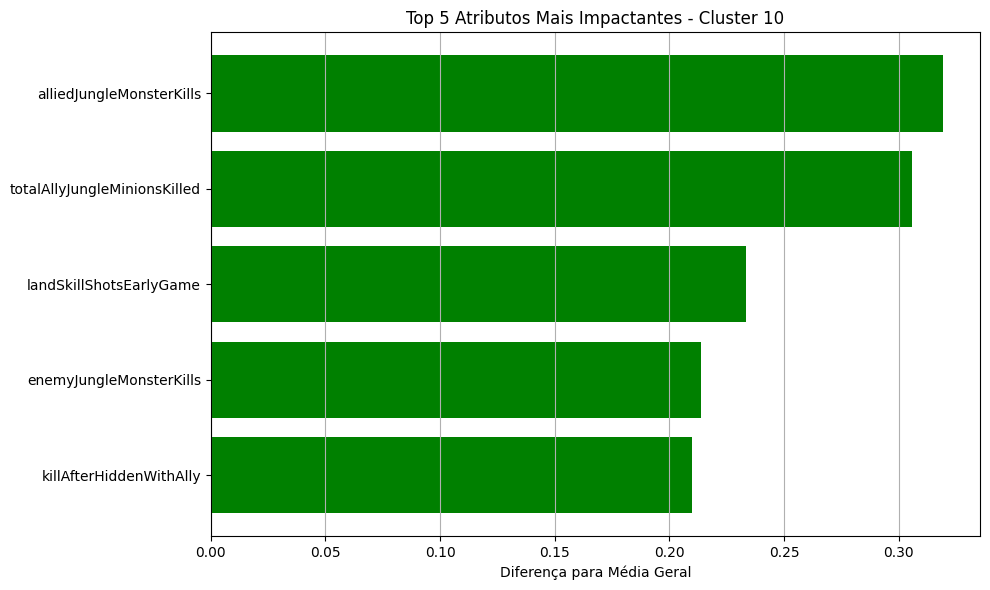

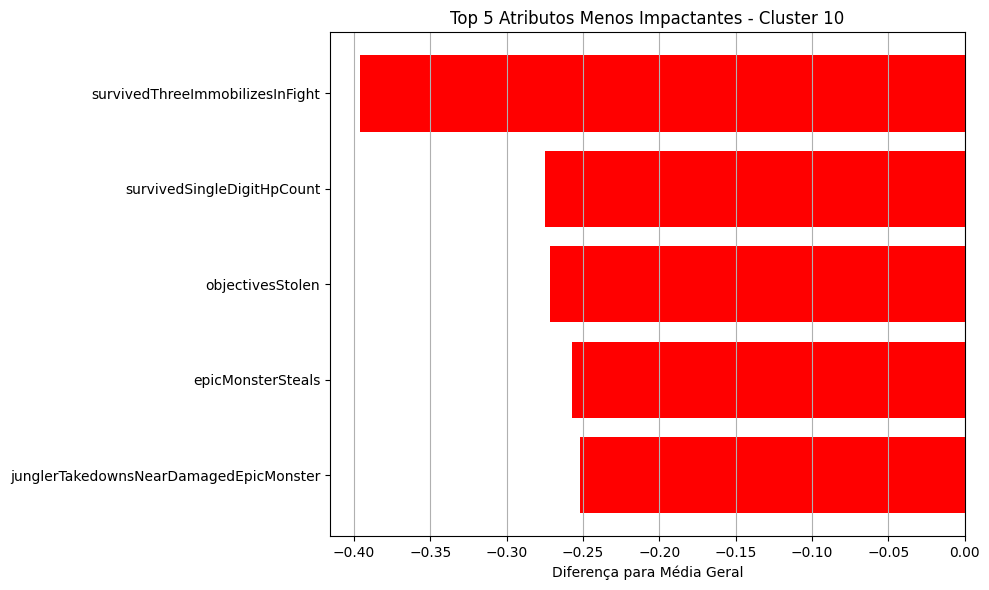


=== Campeões no Cluster 11 ===
['Briar', 'Darius', 'Diana', 'Elise', 'MonkeyKing', 'Nocturne', 'Viego', 'Volibear', 'Warwick', 'Yorick']

=== Atributos Mais Impactantes - Cluster 11 ===
inhibitorKills      0.138499
initialCrabCount    0.129359
dtype: float64

=== Atributos Neutros - Cluster 11 ===
assists                                  -0.097713
totalAllyJungleMinionsKilled             -0.089954
takedownsBeforeJungleMinionSpawn         -0.085455
firstBloodAssist                         -0.079929
laningPhaseGoldExpAdvantage              -0.070656
                                            ...   
immobilizeAndKillWithAlly                 0.080437
damageDealtToObjectives                   0.081021
junglerTakedownsNearDamagedEpicMonster    0.093704
damageDealtToBuildings                    0.099445
turretKills                               0.099451
Length: 61, dtype: float64

=== Atributos Menos Impactantes - Cluster 11 ===
enemyJungleMonsterKills         -0.191604
objectivesStolen    

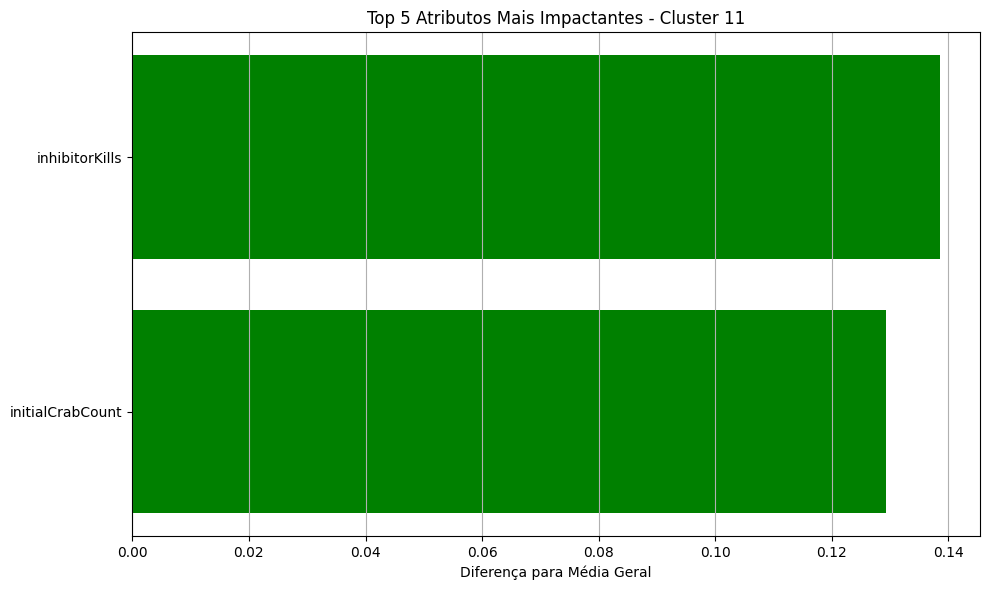

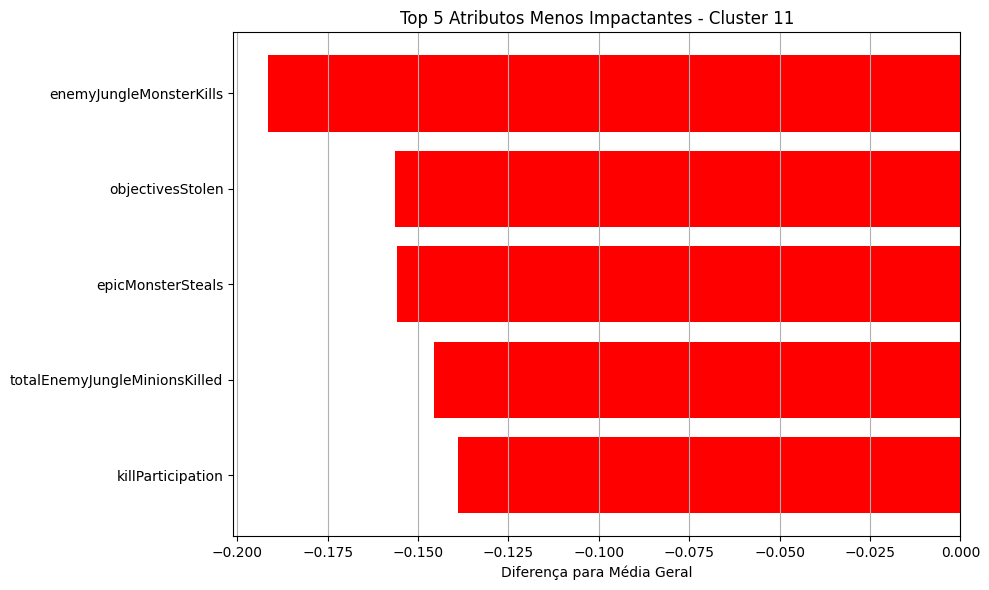


=== Campeões no Cluster 12 ===
['FiddleSticks', 'Gragas', 'Poppy', 'Vi']

=== Atributos Mais Impactantes - Cluster 12 ===
knockEnemyIntoTeamAndKill       0.517919
immobilizeAndKillWithAlly       0.368887
enemyChampionImmobilizations    0.285273
visionScore                     0.251006
controlWardsPlaced              0.215163
objectivesStolen                0.163698
epicMonsterSteals               0.147135
wardsKilled                     0.131775
totalTimeCCDealt                0.119730
dtype: float64

=== Atributos Neutros - Cluster 12 ===
teamDamagePercentage                     -0.092730
tripleKills                              -0.092466
enemyJungleMonsterKills                  -0.091972
jungleCsBefore10Minutes                  -0.080249
damagePerMinute                          -0.076359
survivedSingleDigitHpCount               -0.067512
totalDamageDealtToChampions              -0.063011
killsUnderOwnTurret                      -0.061967
kda                                      -0.0

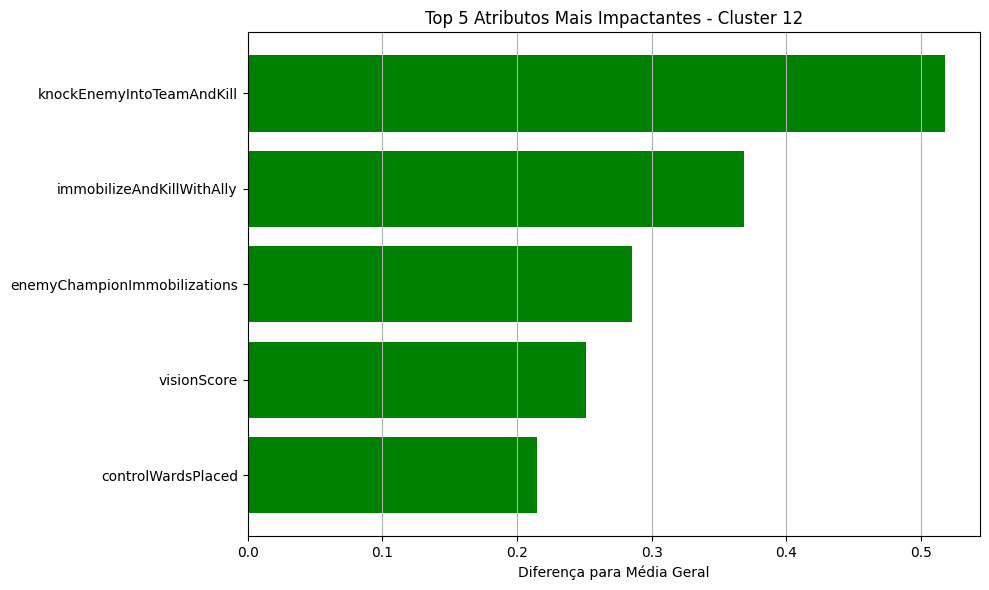

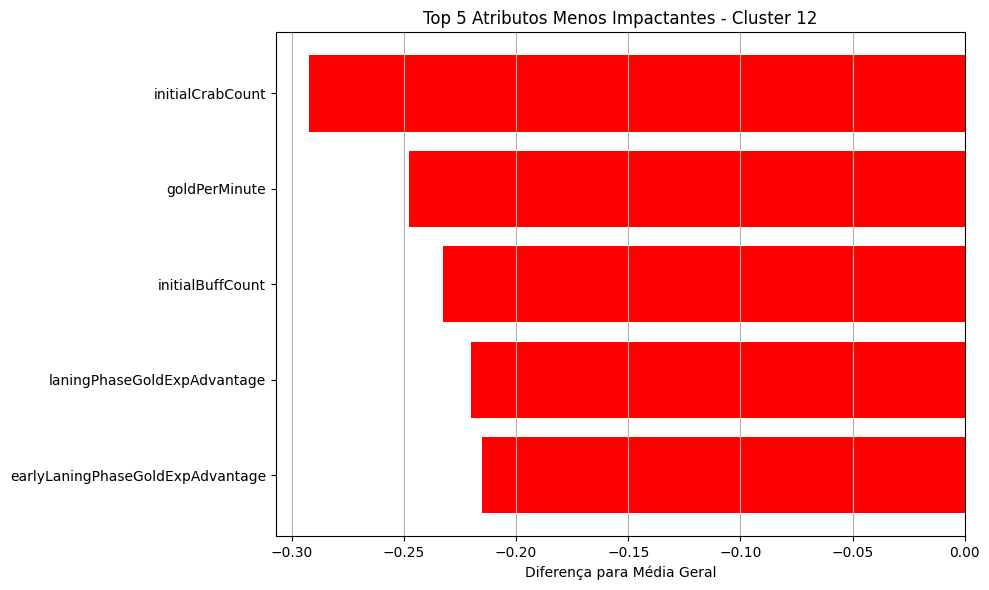


=== Campeões no Cluster 13 ===
['Evelynn', 'JarvanIV', 'LeeSin', 'Pantheon', 'RekSai', 'XinZhao']

=== Atributos Mais Impactantes - Cluster 13 ===
wardsPlaced                        0.204495
killParticipation                  0.169587
controlWardsPlaced                 0.139568
survivedThreeImmobilizesInFight    0.133272
takedowns                          0.128530
firstBloodKill                     0.126334
immobilizeAndKillWithAlly          0.119466
kda                                0.106154
dtype: float64

=== Atributos Neutros - Cluster 13 ===
wardsKilled                              -0.099620
initialBuffCount                         -0.098785
voidMonsterKill                          -0.096453
riftHeraldTakedowns                      -0.088270
totalTimeSpentDead                       -0.074751
knockEnemyIntoTeamAndKill                -0.069560
quadraKills                              -0.068298
buffsStolen                              -0.066945
goldPerMinute                        

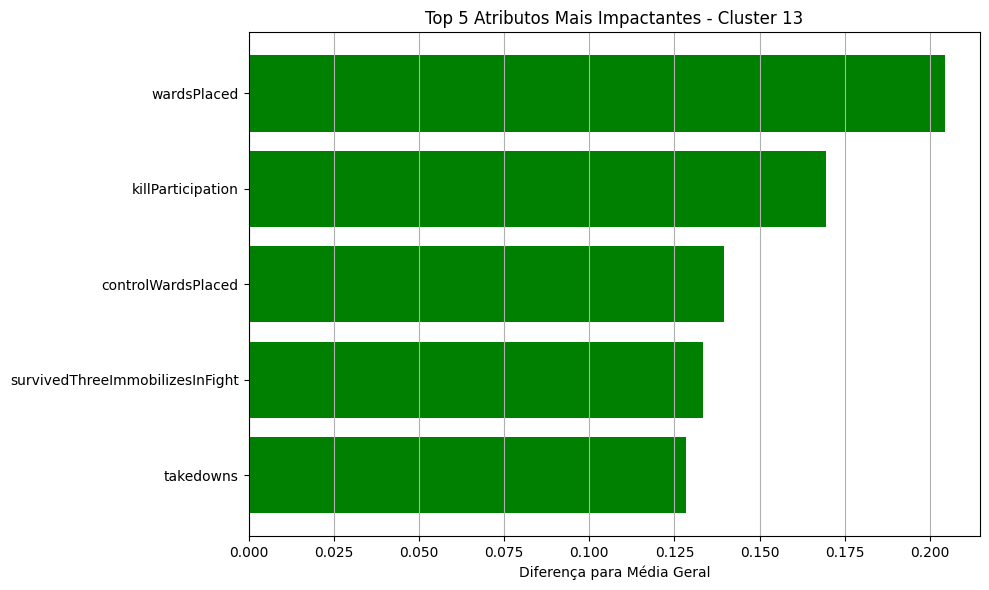

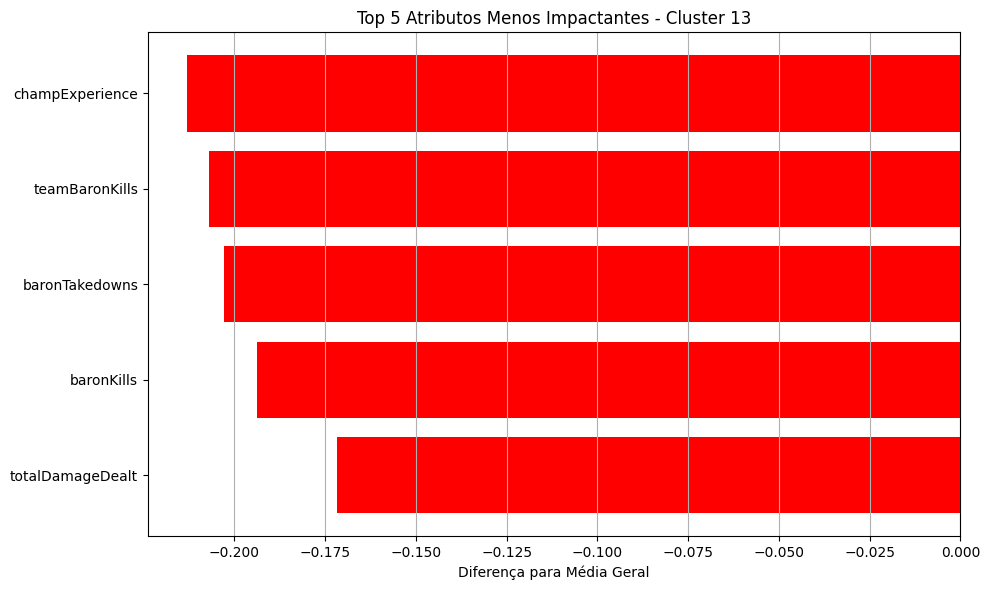

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset correto
win_true_cluster = pd.read_csv('/content/win_true_cluster.csv')

# Variáveis relevantes
variaveis_relevantes = [col for col in win_true_cluster.columns if col not in ['championName', 'cluster']]

# Calcular média geral
media_geral = win_true_cluster[variaveis_relevantes].mean()

# Função para analisar e plotar cada cluster
def analisar_cluster(cluster_num):
    cluster = win_true_cluster[win_true_cluster['cluster'] == cluster_num]
    media_cluster = cluster[variaveis_relevantes].mean()
    diferenca = media_cluster - media_geral

    atributos_mais_impactantes = diferenca[diferenca > 0.10].sort_values(ascending=False)
    atributos_neutros = diferenca[(diferenca >= -0.10) & (diferenca <= 0.10)].sort_values()
    atributos_menos_impactantes = diferenca[diferenca < -0.10].sort_values()

    print(f"\n=== Campeões no Cluster {cluster_num} ===")
    print(cluster['championName'].tolist())

    print(f"\n=== Atributos Mais Impactantes - Cluster {cluster_num} ===")
    print(atributos_mais_impactantes)

    print(f"\n=== Atributos Neutros - Cluster {cluster_num} ===")
    print(atributos_neutros)

    print(f"\n=== Atributos Menos Impactantes - Cluster {cluster_num} ===")
    print(atributos_menos_impactantes)

    top5_positivos = atributos_mais_impactantes.head(5)
    top5_negativos = atributos_menos_impactantes.head(5)

    plt.figure(figsize=(10, 6))
    plt.barh(top5_positivos.index, top5_positivos.values, color='green')
    plt.xlabel('Diferença para Média Geral')
    plt.title(f'Top 5 Atributos Mais Impactantes - Cluster {cluster_num}')
    plt.gca().invert_yaxis()
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.barh(top5_negativos.index, top5_negativos.values, color='red')
    plt.xlabel('Diferença para Média Geral')
    plt.title(f'Top 5 Atributos Menos Impactantes - Cluster {cluster_num}')
    plt.gca().invert_yaxis()
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

# Detectar automaticamente todos os clusters únicos
clusters_unicos = sorted(win_true_cluster['cluster'].unique())

# Rodar a análise para cada cluster encontrado
for cluster_id in clusters_unicos:
    analisar_cluster(cluster_id)



=== Campeões no Cluster 1 ===
['Diana', 'Ekko', 'Gwen', 'MasterYi', 'Rengar']

=== Atributos Mais Impactantes - Cluster 1 ===
turretKills                               0.374893
damageDealtToBuildings                    0.359069
goldSpent                                 0.268619
goldEarned                                0.263467
doubleKills                               0.257030
goldPerMinute                             0.241335
turretTakedowns                           0.236619
inhibitorKills                            0.233244
largestMultiKill                          0.224181
soloKills                                 0.216238
tripleKills                               0.211343
bountyLevel                               0.199555
kills                                     0.199339
totalDamageDealt                          0.191049
champExperience                           0.171481
killsNearEnemyTurret                      0.169293
teamBaronKills                            0.165842
quadra

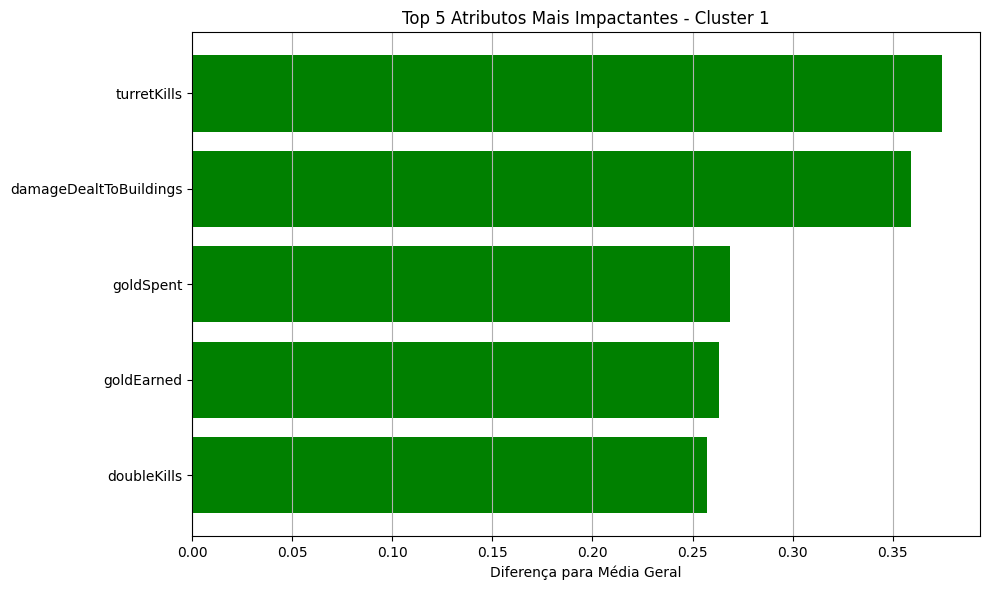

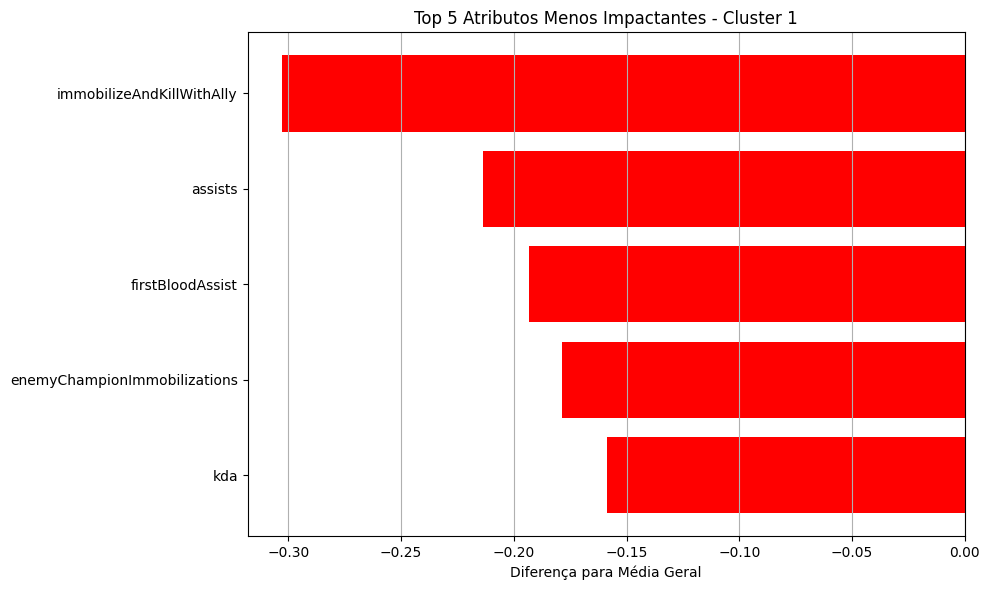


=== Campeões no Cluster 2 ===
['Yorick']

=== Atributos Mais Impactantes - Cluster 2 ===
inhibitorKills                  0.811955
damageDealtToBuildings          0.752857
turretKills                     0.720723
turretTakedowns                 0.659154
quadraKills                     0.617628
baronTakedowns                  0.327300
teamRiftHeraldKills             0.325120
riftHeraldTakedowns             0.308751
teamBaronKills                  0.298929
baronKills                      0.273540
damageDealtToObjectives         0.252602
totalAllyJungleMinionsKilled    0.123630
dtype: float64

=== Atributos Neutros - Cluster 2 ===
enemyJungleMonsterKills                  -0.085249
landSkillShotsEarlyGame                  -0.078961
firstBloodKill                           -0.076155
deaths                                   -0.071743
visionScore                              -0.067241
totalTimeSpentDead                       -0.061524
voidMonsterKill                          -0.059464
goldPer

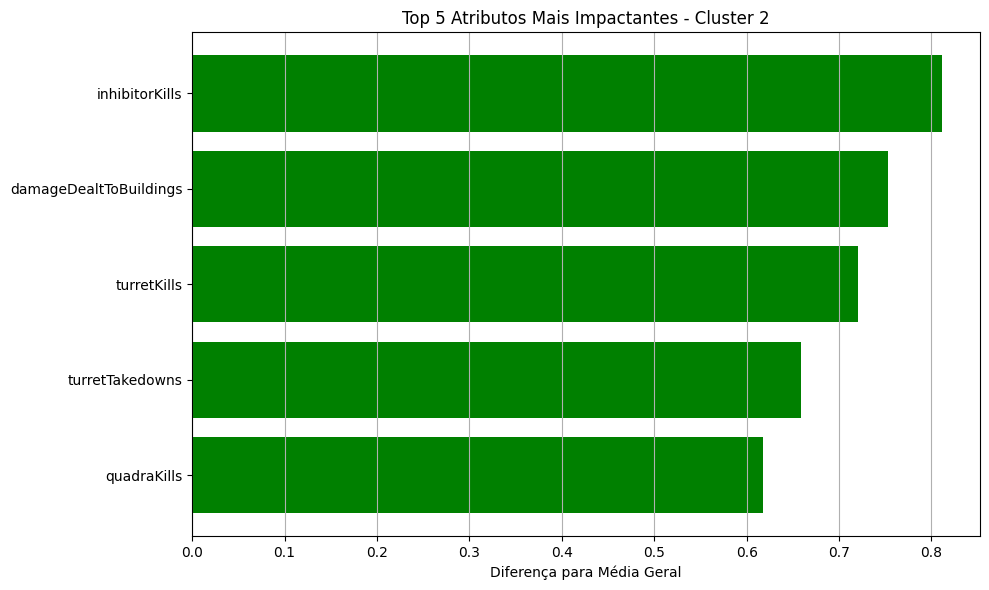

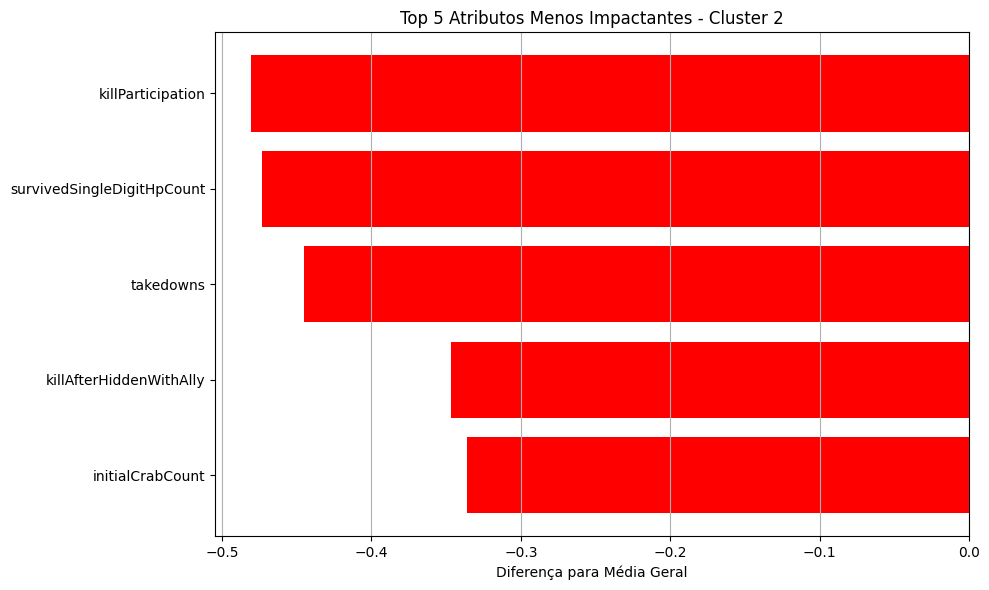


=== Campeões no Cluster 3 ===
['Shyvana']

=== Atributos Mais Impactantes - Cluster 3 ===
dragonTakedowns                           0.716540
epicMonsterKillsWithin30SecondsOfSpawn    0.689469
laningPhaseGoldExpAdvantage               0.645331
damageDealtToObjectives                   0.624764
objectivesStolen                          0.606371
epicMonsterKillsNearEnemyJungler          0.591241
inhibitorKills                            0.583309
initialCrabCount                          0.575203
totalDamageDealt                          0.565058
champExperience                           0.561593
epicMonsterSteals                         0.556228
turretKills                               0.459971
jungleCsBefore10Minutes                   0.452378
totalAllyJungleMinionsKilled              0.449381
damageDealtToBuildings                    0.443510
alliedJungleMonsterKills                  0.430268
goldEarned                                0.407458
voidMonsterKill                           

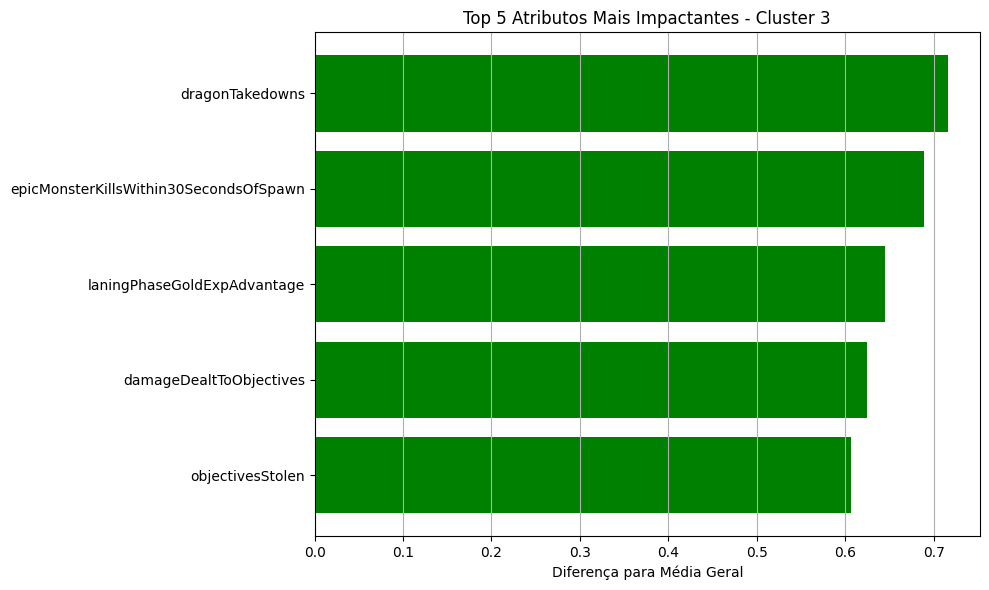

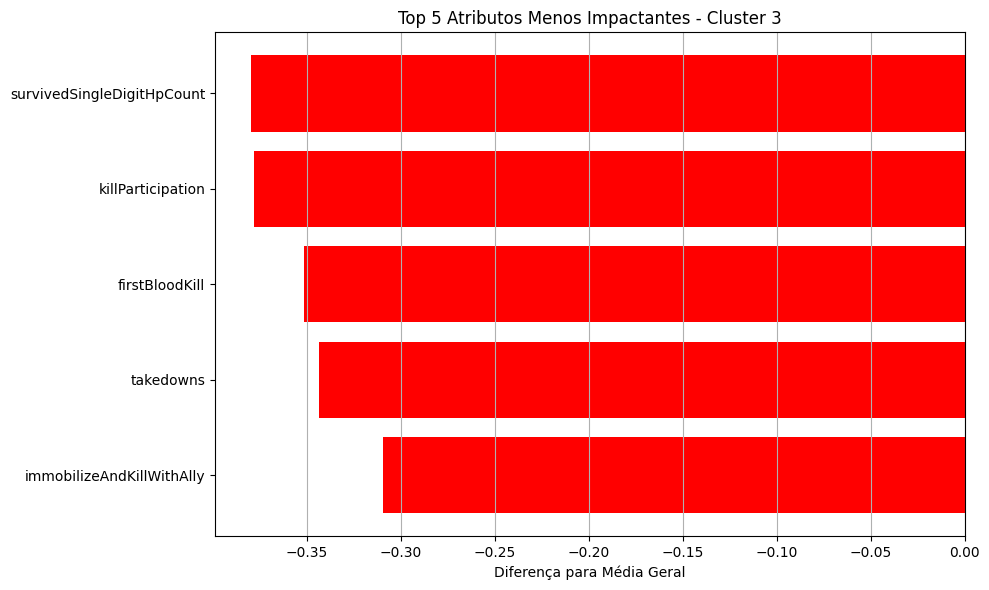


=== Campeões no Cluster 4 ===
['Kindred', 'Nidalee']

=== Atributos Mais Impactantes - Cluster 4 ===
totalHealsOnTeammates               0.909760
takedownsBeforeJungleMinionSpawn    0.364155
wardsKilled                         0.337229
earlyLaningPhaseGoldExpAdvantage    0.288681
totalEnemyJungleMinionsKilled       0.252875
survivedSingleDigitHpCount          0.210966
initialCrabCount                    0.187168
enemyJungleMonsterKills             0.183921
buffsStolen                         0.143059
initialBuffCount                    0.109930
killsNearEnemyTurret                0.107747
firstBloodKill                      0.107375
dtype: float64

=== Atributos Neutros - Cluster 4 ===
soloKills                             -0.096816
goldSpent                             -0.092495
jungleCsBefore10Minutes               -0.091704
totalDamageDealt                      -0.084557
goldEarned                            -0.079426
longestTimeSpentLiving                -0.066991
riftHeraldTakedo

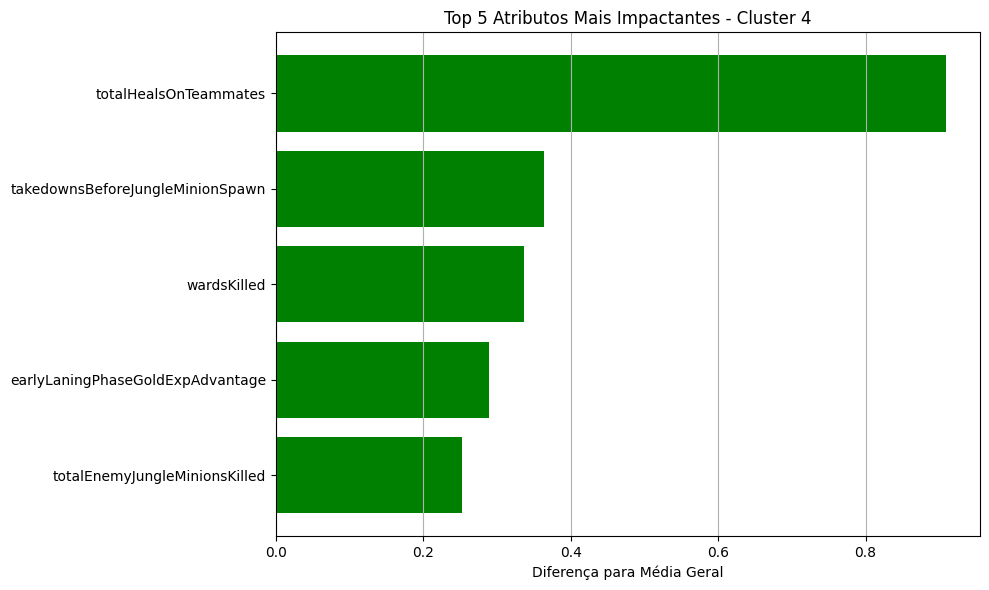

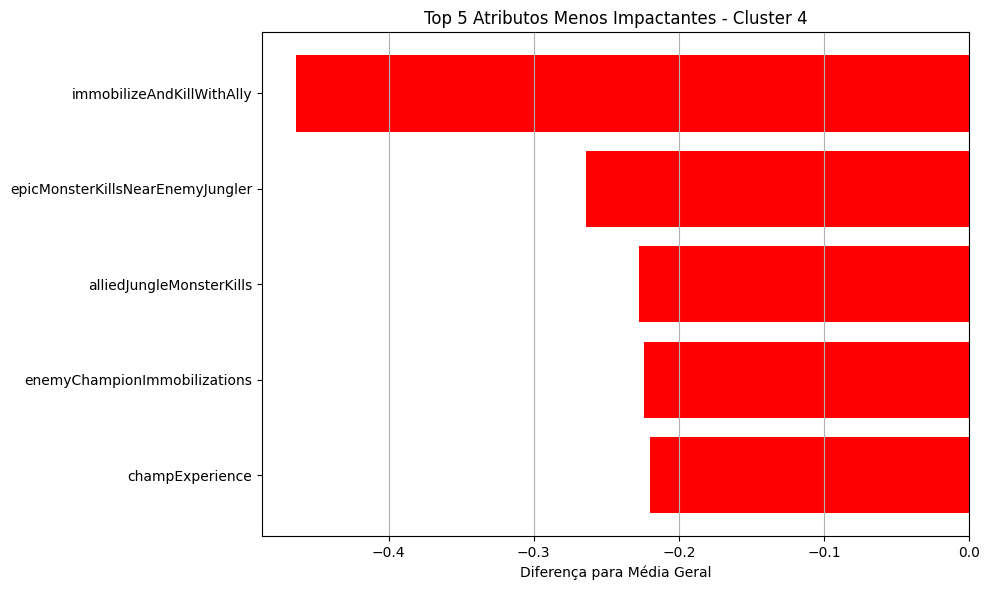


=== Campeões no Cluster 5 ===
['Graves', 'Kayn', 'Khazix', 'Naafiri', 'Shaco', 'Talon', 'Zed']

=== Atributos Mais Impactantes - Cluster 5 ===
epicMonsterSteals                         0.299406
totalEnemyJungleMinionsKilled             0.283578
enemyJungleMonsterKills                   0.277139
objectivesStolen                          0.272675
survivedSingleDigitHpCount                0.263432
bountyLevel                               0.232451
kills                                     0.232320
soloKills                                 0.216666
goldSpent                                 0.212927
largestKillingSpree                       0.212699
goldEarned                                0.207628
initialBuffCount                          0.182936
killsNearEnemyTurret                      0.178499
goldPerMinute                             0.176065
junglerTakedownsNearDamagedEpicMonster    0.154633
firstBloodKill                            0.148920
laningPhaseGoldExpAdvantage             

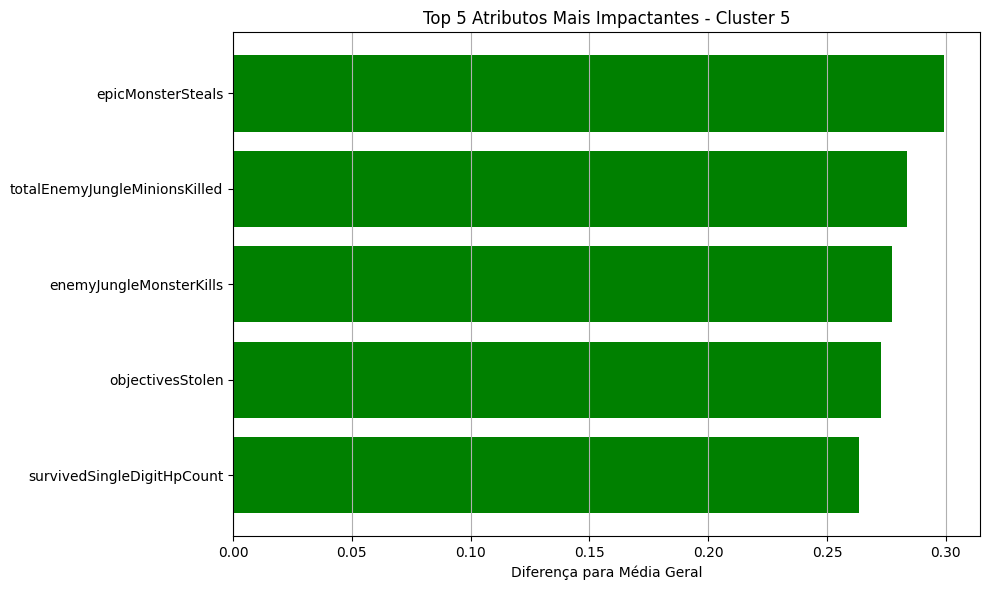

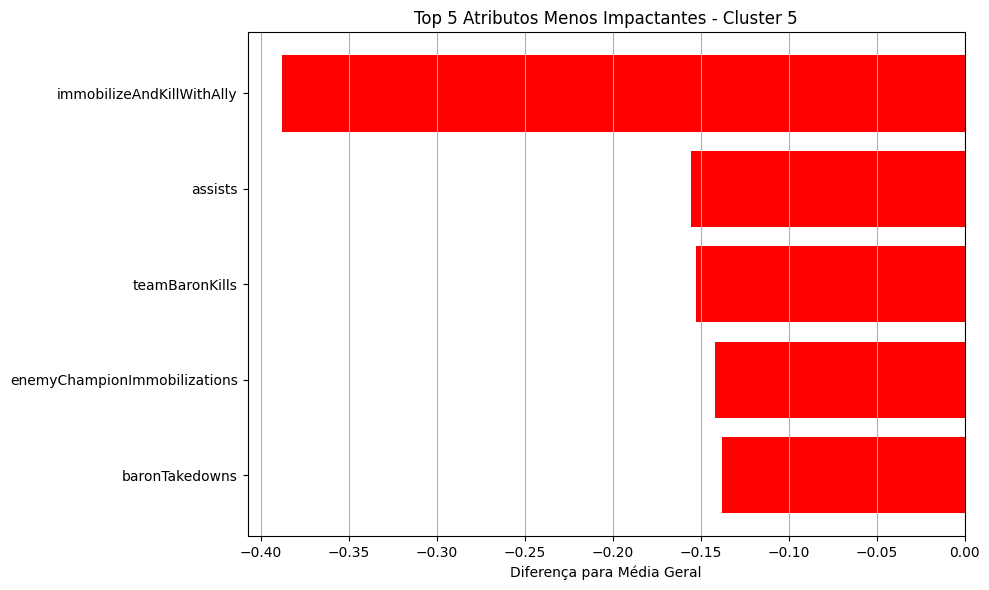


=== Campeões no Cluster 6 ===
['DrMundo', 'Hecarim', 'Lillia', 'Udyr']

=== Atributos Mais Impactantes - Cluster 6 ===
enemyJungleMonsterKills                0.342706
jungleCsBefore10Minutes                0.315145
alliedJungleMonsterKills               0.276330
totalAllyJungleMinionsKilled           0.256315
earlyLaningPhaseGoldExpAdvantage       0.236381
initialCrabCount                       0.233580
totalEnemyJungleMinionsKilled          0.228178
totalDamageTaken                       0.216240
laningPhaseGoldExpAdvantage            0.209218
totalDamageDealt                       0.208517
totalTimeCCDealt                       0.192200
survivedSingleDigitHpCount             0.190090
champExperience                        0.126330
killsOnOtherLanesEarlyJungleAsLaner    0.125000
takedownsBeforeJungleMinionSpawn       0.114051
dtype: float64

=== Atributos Neutros - Cluster 6 ===
deaths                                   -0.097014
visionScore                              -0.089486
epic

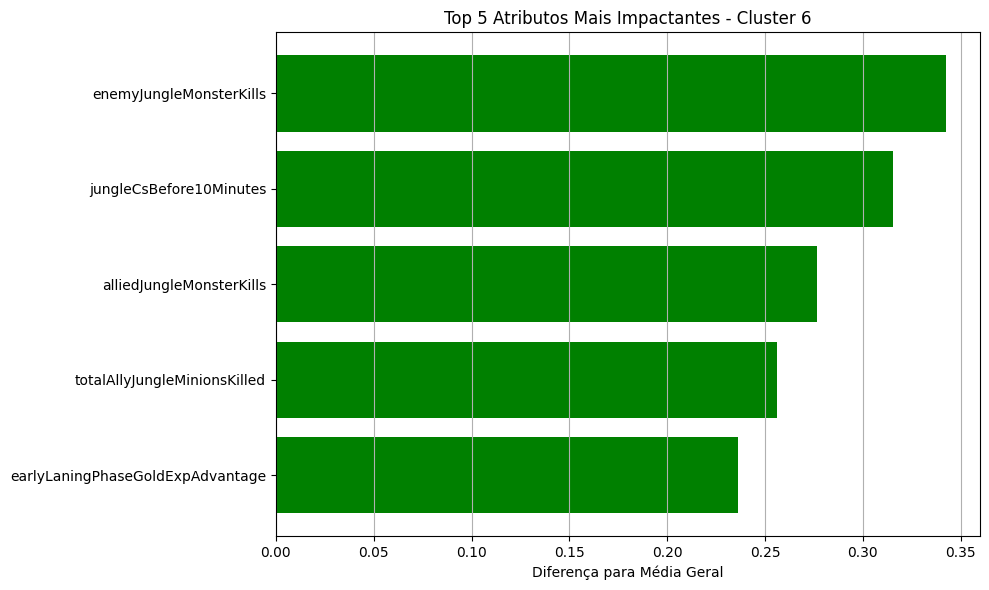

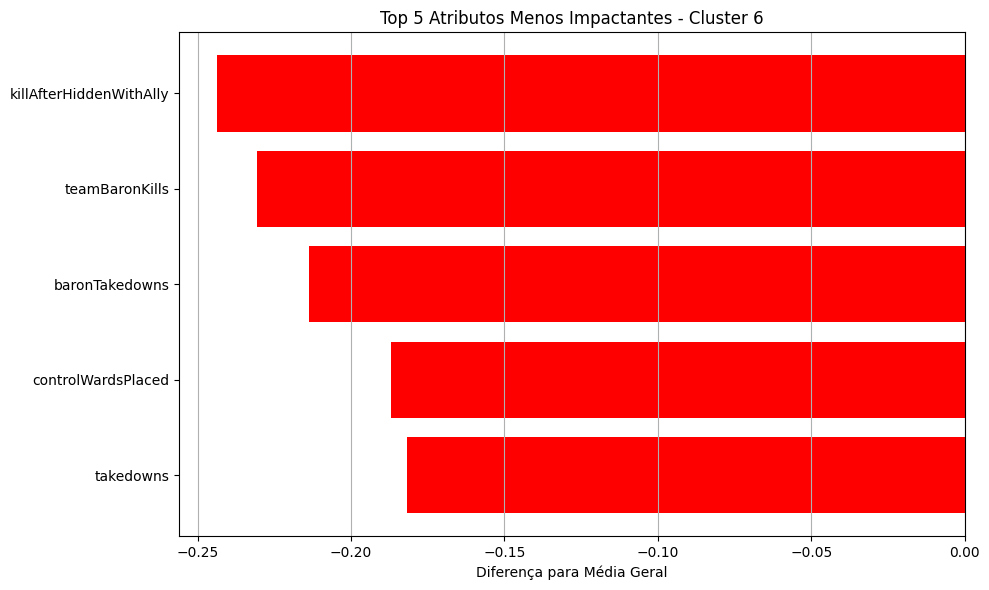


=== Campeões no Cluster 7 ===
['Brand', 'Taliyah', 'Zyra']

=== Atributos Mais Impactantes - Cluster 7 ===
alliedJungleMonsterKills                  0.362098
totalAllyJungleMinionsKilled              0.339882
earlyLaningPhaseGoldExpAdvantage          0.253301
totalDamageDealt                          0.232698
landSkillShotsEarlyGame                   0.221370
totalDamageDealtToChampions               0.215237
jungleCsBefore10Minutes                   0.213607
teamDamagePercentage                      0.211421
damagePerMinute                           0.205500
killsUnderOwnTurret                       0.199148
enemyJungleMonsterKills                   0.168405
controlWardsPlaced                        0.167742
killAfterHiddenWithAlly                   0.159604
champExperience                           0.149968
teamBaronKills                            0.134468
baronTakedowns                            0.129440
baronKills                                0.124508
assists                  

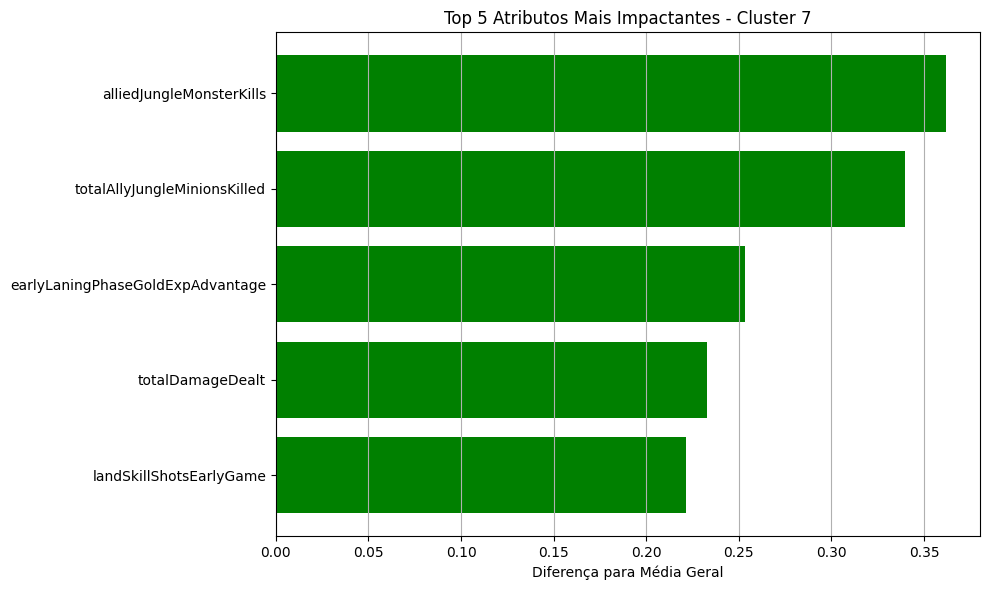

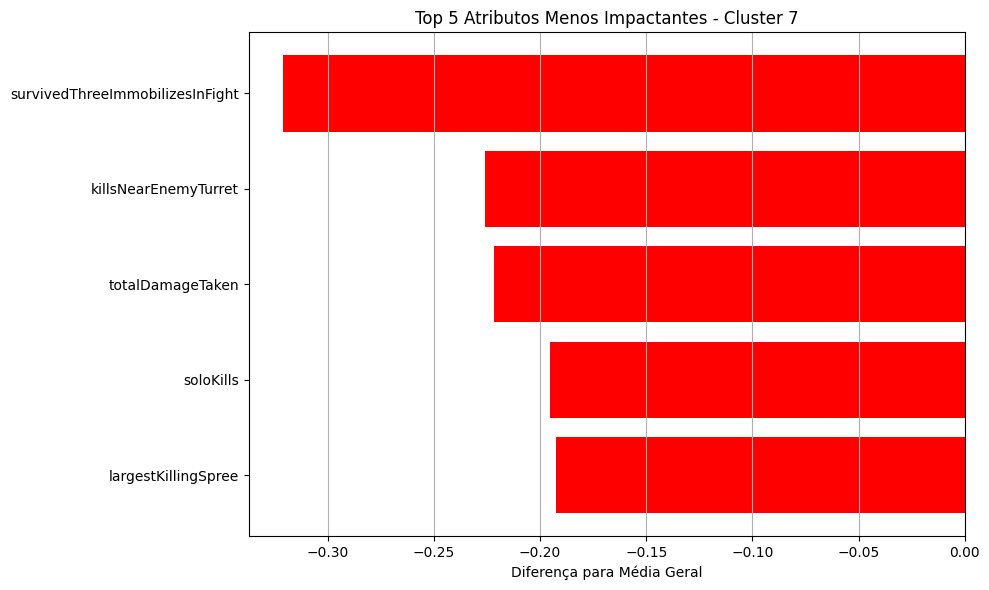


=== Campeões no Cluster 8 ===
['Karthus']

=== Atributos Mais Impactantes - Cluster 8 ===
killsUnderOwnTurret                       0.718510
totalDamageDealtToChampions               0.668901
damagePerMinute                           0.667694
teamDamagePercentage                      0.619390
earlyLaningPhaseGoldExpAdvantage          0.580211
laningPhaseGoldExpAdvantage               0.577724
deaths                                    0.534588
totalTimeSpentDead                        0.531026
goldPerMinute                             0.499842
takedowns                                 0.497208
goldEarned                                0.496010
goldSpent                                 0.495881
killAfterHiddenWithAlly                   0.449005
totalDamageDealt                          0.445764
totalAllyJungleMinionsKilled              0.420906
killParticipation                         0.403222
alliedJungleMonsterKills                  0.392954
champExperience                           

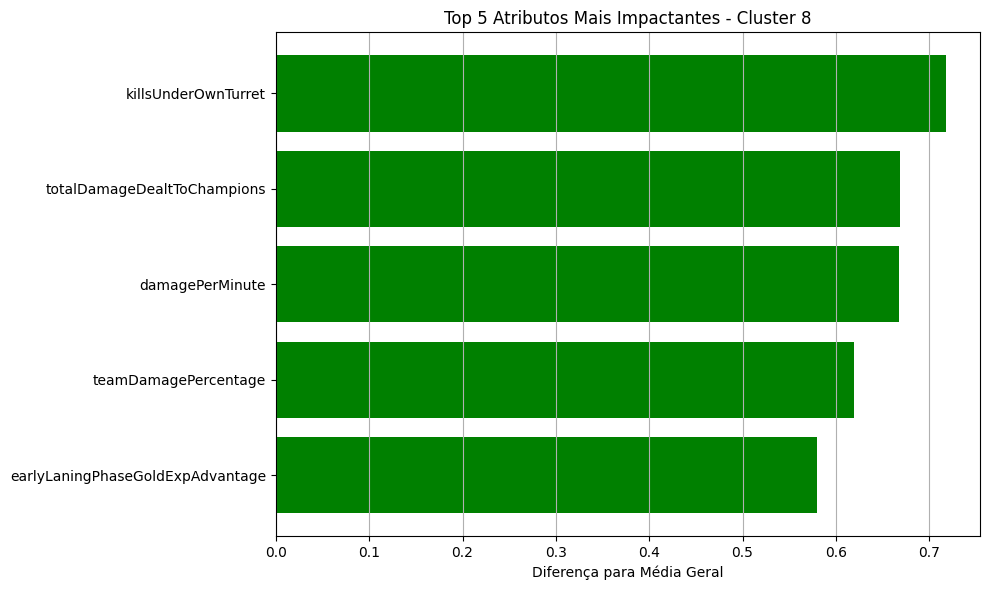

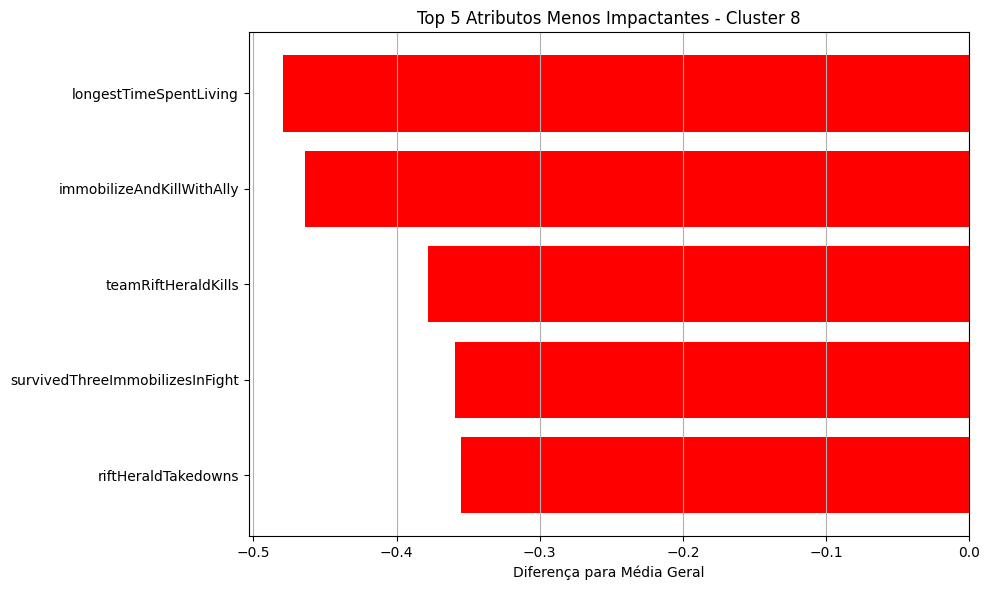


=== Campeões no Cluster 9 ===
['Rammus', 'Sejuani', 'Skarner', 'Zac']

=== Atributos Mais Impactantes - Cluster 9 ===
survivedThreeImmobilizesInFight     0.455902
immobilizeAndKillWithAlly           0.404855
enemyChampionImmobilizations        0.375715
assists                             0.367333
kda                                 0.324170
longestTimeSpentLiving              0.252287
takedowns                           0.215724
knockEnemyIntoTeamAndKill           0.200408
baronTakedowns                      0.176502
objectivesStolen                    0.167262
killParticipation                   0.157906
epicMonsterSteals                   0.141408
totalDamageTaken                    0.135542
teamBaronKills                      0.128543
baronKills                          0.126926
epicMonsterKillsNearEnemyJungler    0.125408
dtype: float64

=== Atributos Neutros - Cluster 9 ===
landSkillShotsEarlyGame               -0.092412
wardsKilled                           -0.092155
turretTaked

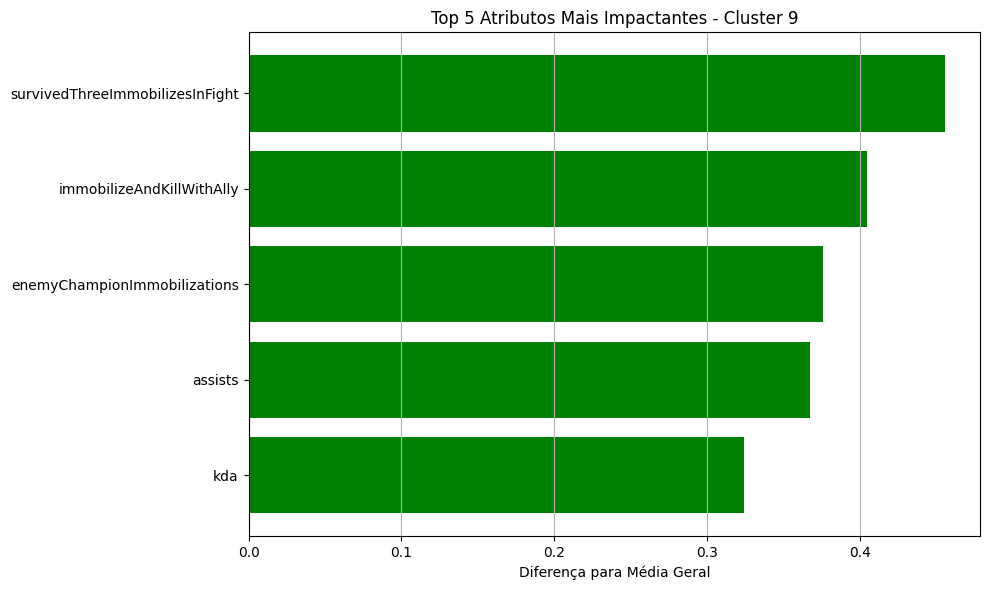

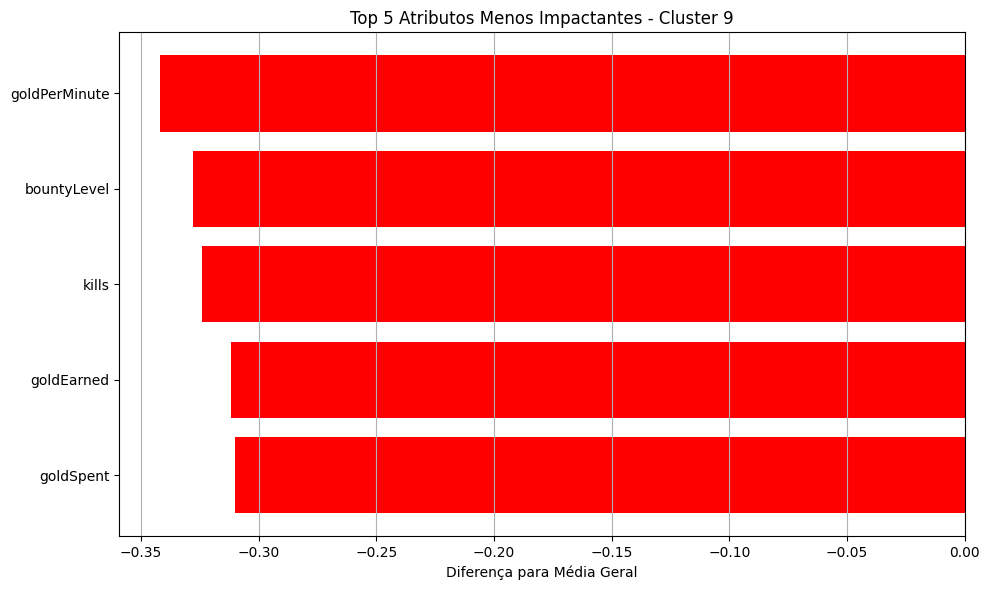


=== Campeões no Cluster 10 ===
['Nunu']

=== Atributos Mais Impactantes - Cluster 10 ===
landSkillShotsEarlyGame                   0.880557
baronTakedowns                            0.648307
riftHeraldTakedowns                       0.644847
teamRiftHeraldKills                       0.621979
baronKills                                0.606535
teamBaronKills                            0.602173
assists                                   0.457188
firstBloodAssist                          0.456876
epicMonsterKillsNearEnemyJungler          0.419046
takedowns                                 0.335274
initialCrabCount                          0.325941
immobilizeAndKillWithAlly                 0.311657
dragonTakedowns                           0.305177
survivedThreeImmobilizesInFight           0.276396
damageDealtToObjectives                   0.266122
enemyChampionImmobilizations              0.236625
survivedSingleDigitHpCount                0.235689
voidMonsterKill                           0

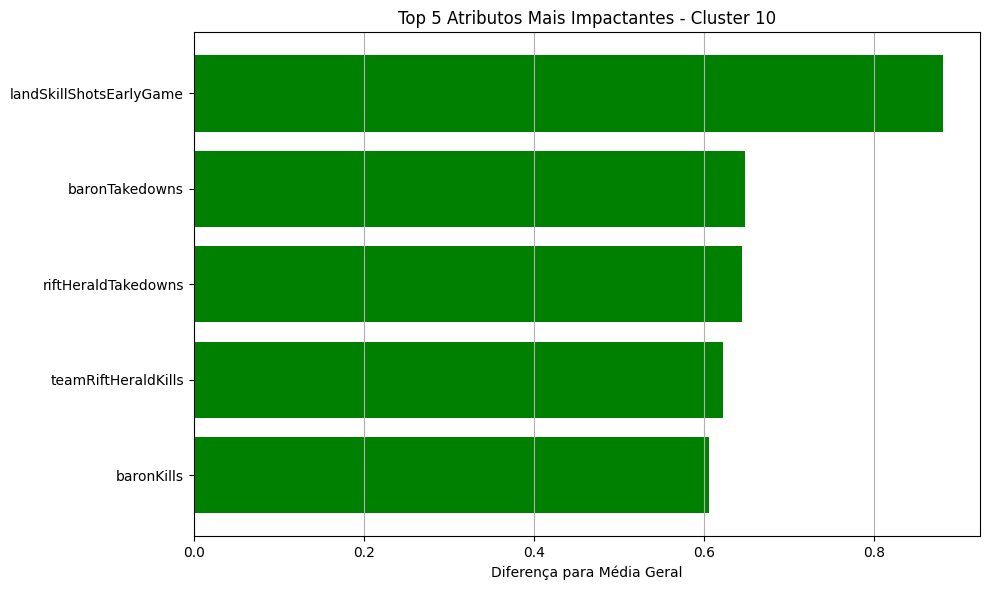

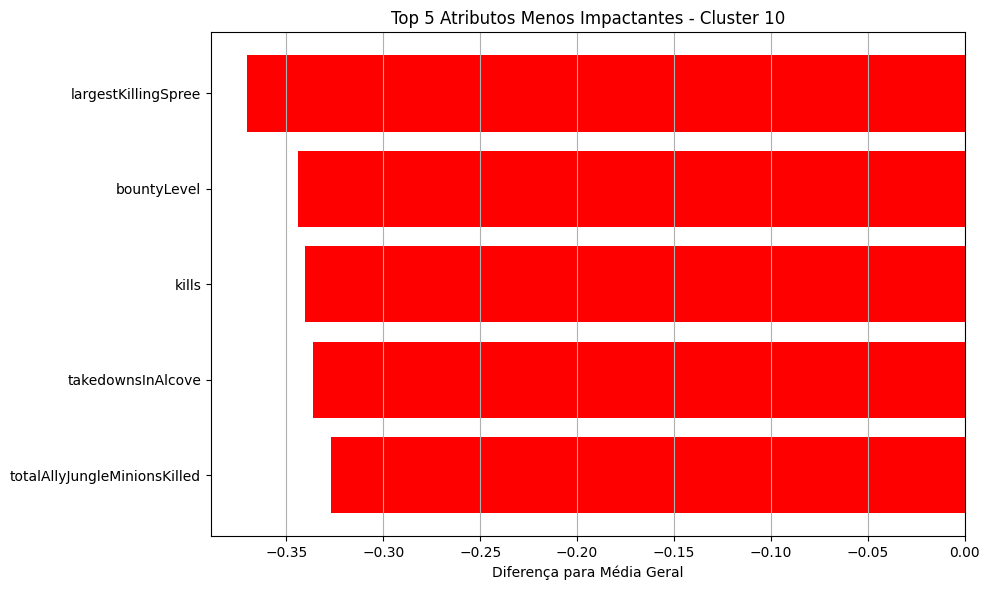


=== Campeões no Cluster 11 ===
['Ivern']

=== Atributos Mais Impactantes - Cluster 11 ===
kda                                 0.745191
assists                             0.639626
firstBloodAssist                    0.580012
killAfterHiddenWithAlly             0.570405
initialBuffCount                    0.553695
totalHealsOnTeammates               0.533295
longestTimeSpentLiving              0.520617
killParticipation                   0.431487
takedowns                           0.334888
buffsStolen                         0.297028
survivedSingleDigitHpCount          0.294196
baronTakedowns                      0.260178
controlWardsPlaced                  0.259133
turretTakedowns                     0.247427
immobilizeAndKillWithAlly           0.245008
teamBaronKills                      0.240462
teamRiftHeraldKills                 0.219120
takedownsBeforeJungleMinionSpawn    0.211242
enemyChampionImmobilizations        0.194210
wardsKilled                         0.182292
riftHeral

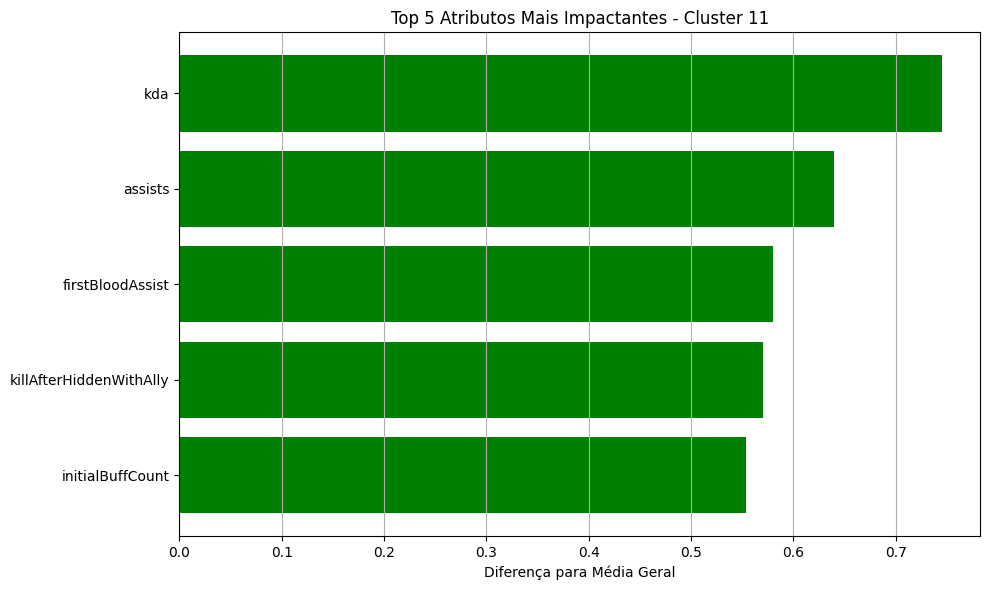

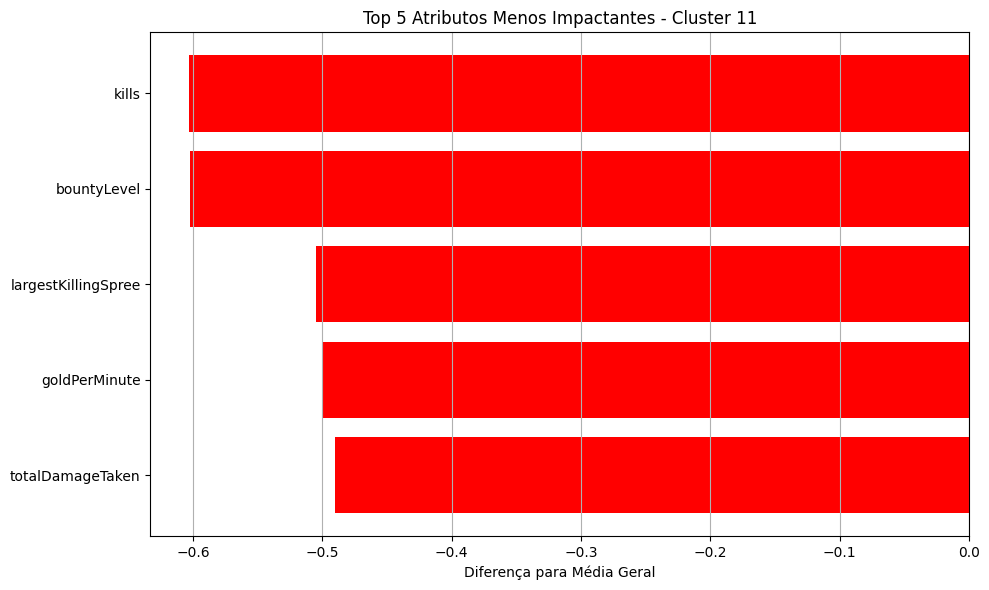


=== Campeões no Cluster 12 ===
['Amumu', 'FiddleSticks']

=== Atributos Mais Impactantes - Cluster 12 ===
visionScore                               0.373660
immobilizeAndKillWithAlly                 0.371770
epicMonsterKillsNearEnemyJungler          0.312243
enemyChampionImmobilizations              0.264414
assists                                   0.189826
killAfterHiddenWithAlly                   0.182280
voidMonsterKill                           0.181978
deaths                                    0.142827
totalTimeSpentDead                        0.129128
dragonTakedowns                           0.104494
epicMonsterKillsWithin30SecondsOfSpawn    0.102566
dtype: float64

=== Atributos Neutros - Cluster 12 ===
epicMonsterSteals                        -0.096638
riftHeraldTakedowns                      -0.093965
wardsKilled                              -0.093086
junglerTakedownsNearDamagedEpicMonster   -0.091962
kda                                      -0.087567
objectivesStolen      

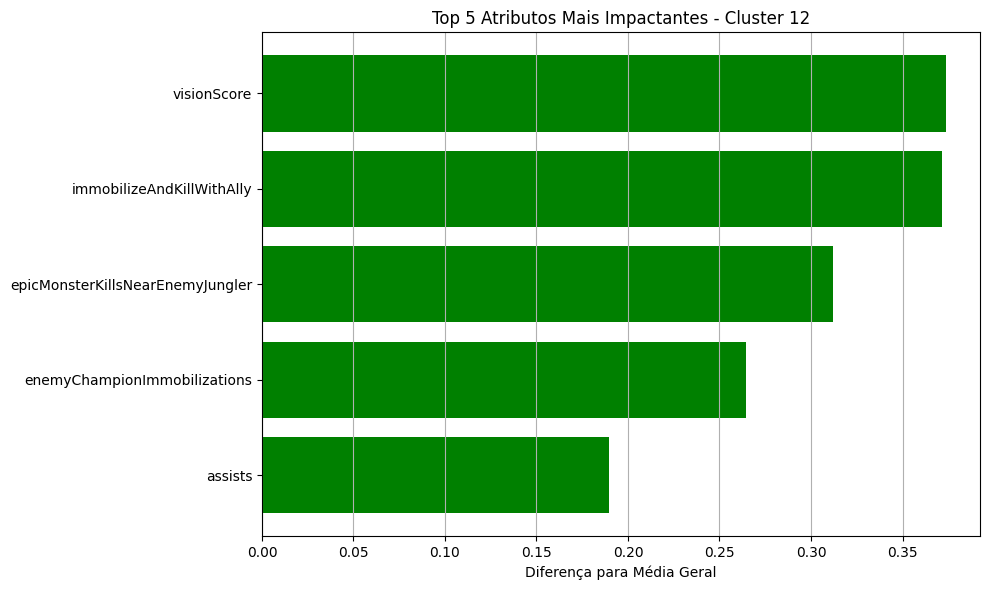

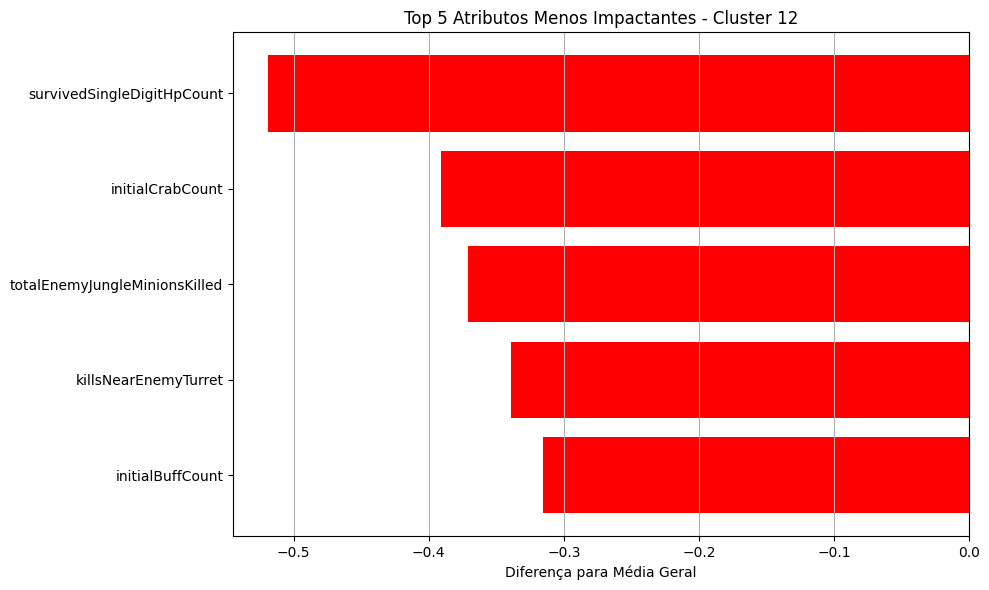


=== Campeões no Cluster 13 ===
['Gragas', 'JarvanIV', 'MonkeyKing', 'Nocturne', 'Poppy', 'RekSai', 'Vi', 'Volibear', 'XinZhao']

=== Atributos Mais Impactantes - Cluster 13 ===
immobilizeAndKillWithAlly    0.203574
knockEnemyIntoTeamAndKill    0.152038
dtype: float64

=== Atributos Neutros - Cluster 13 ===
quadraKills                              -0.095863
buffsStolen                              -0.094305
takedownsBeforeJungleMinionSpawn         -0.093628
totalDamageDealtToChampions              -0.088532
killsUnderOwnTurret                      -0.087489
teamDamagePercentage                     -0.081787
soloKills                                -0.081568
damagePerMinute                          -0.080720
baronTakedowns                           -0.079532
tripleKills                              -0.077165
landSkillShotsEarlyGame                  -0.076795
kills                                    -0.075139
bountyLevel                              -0.074040
initialCrabCount            

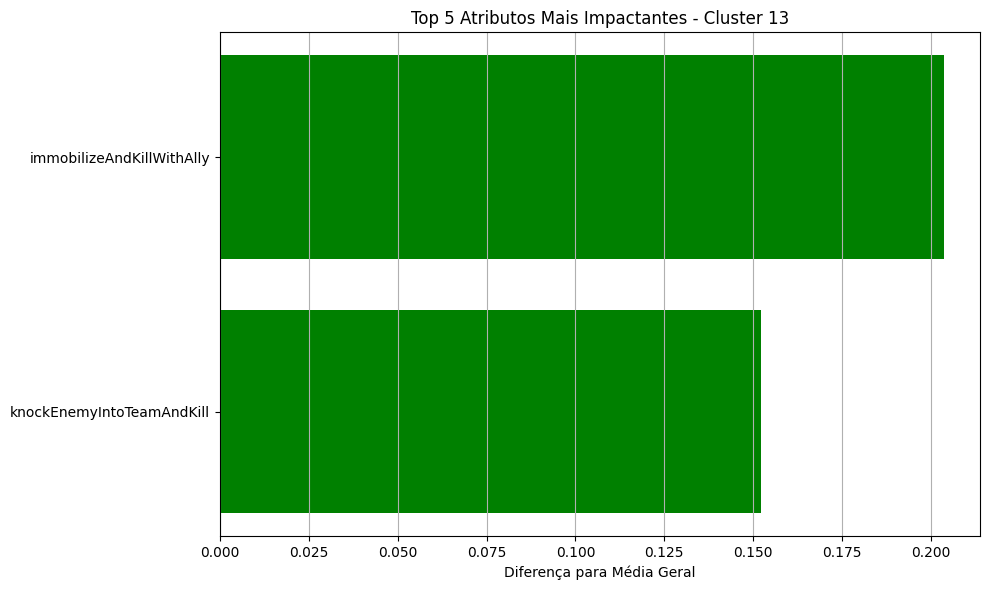

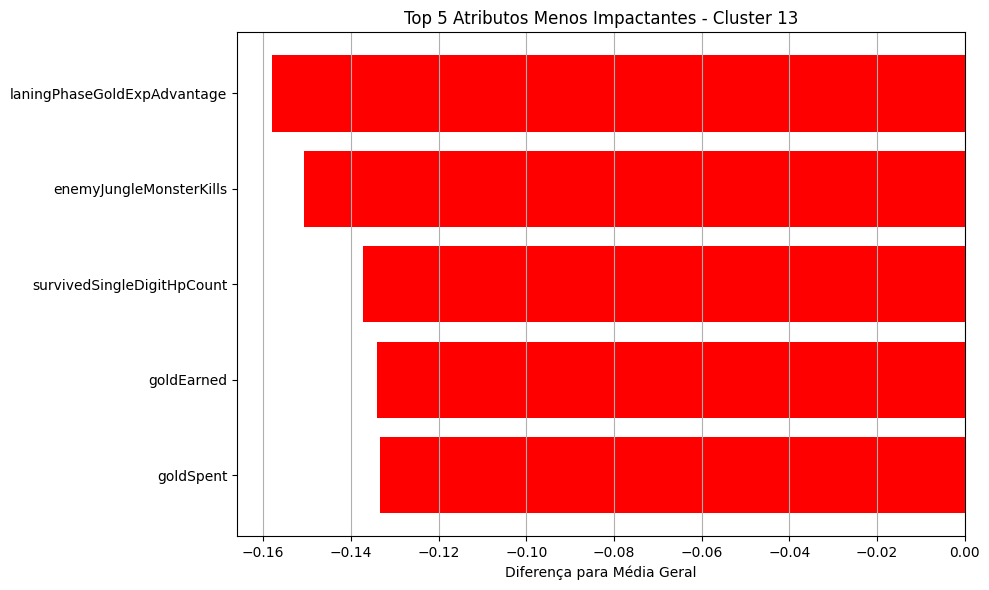


=== Campeões no Cluster 14 ===
['Evelynn', 'LeeSin']

=== Atributos Mais Impactantes - Cluster 14 ===
wardsPlaced                         0.572140
killsNearEnemyTurret                0.311345
takedownsInAlcove                   0.307023
largestKillingSpree                 0.300938
survivedSingleDigitHpCount          0.239113
bountyLevel                         0.215209
kills                               0.213657
controlWardsPlaced                  0.193862
takedownsBeforeJungleMinionSpawn    0.172255
epicMonsterSteals                   0.167759
objectivesStolen                    0.167013
firstBloodKill                      0.157153
soloKills                           0.119939
landSkillShotsEarlyGame             0.116563
killAfterHiddenWithAlly             0.115302
dtype: float64

=== Atributos Neutros - Cluster 14 ===
teamRiftHeraldKills                      -0.098854
epicMonsterKillsNearEnemyJungler         -0.098095
assists                                  -0.085382
enemyChampionI

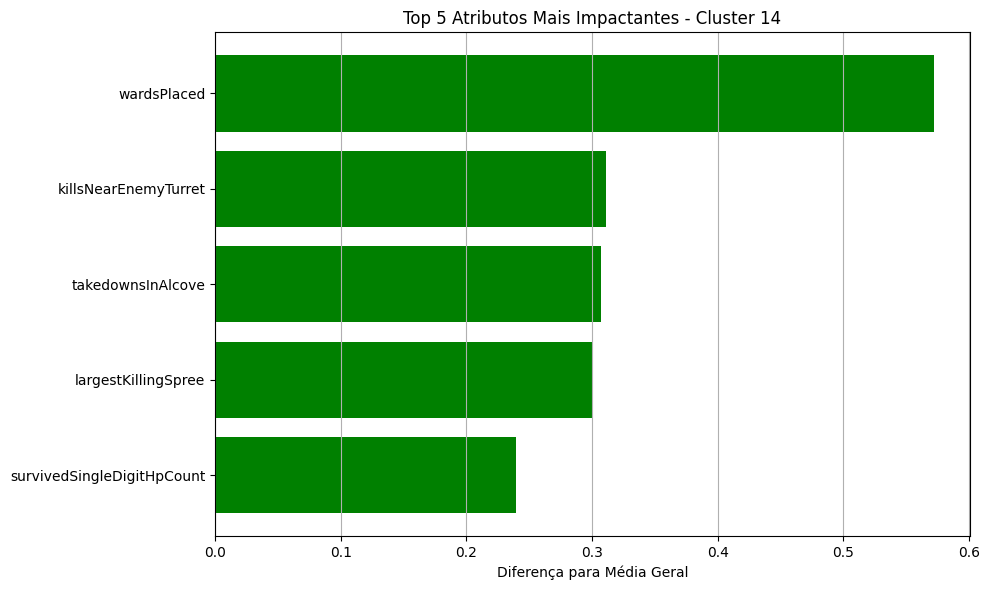

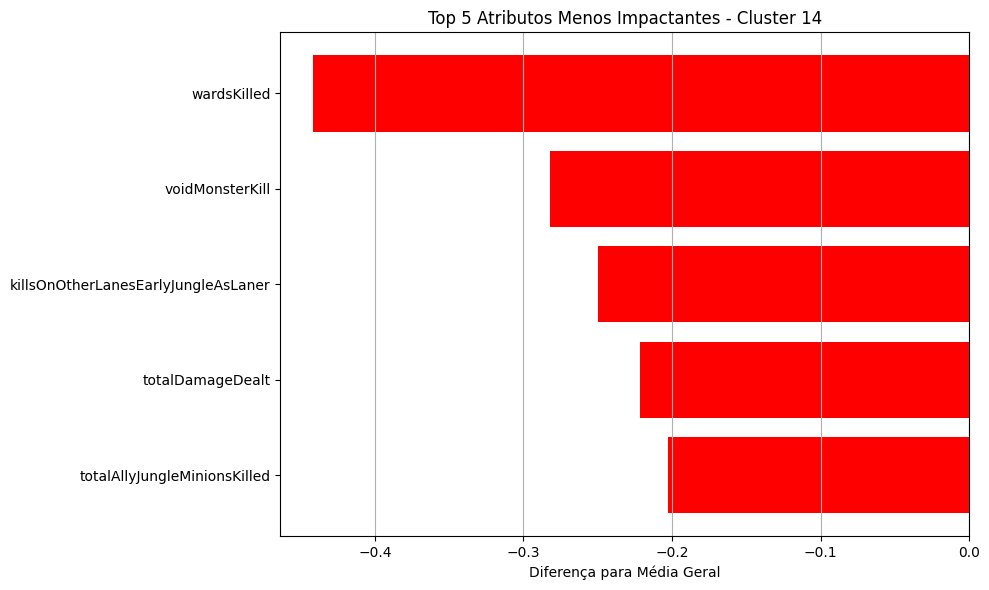


=== Campeões no Cluster 15 ===
['Belveth', 'Briar', 'Darius', 'Elise', 'Pantheon', 'Viego', 'Warwick']

=== Atributos Mais Impactantes - Cluster 15 ===
immobilizeAndKillWithAlly                 0.217183
takedownsInAlcove                         0.198507
quadraKills                               0.180306
kills                                     0.176828
bountyLevel                               0.174657
largestKillingSpree                       0.159045
firstBloodKill                            0.151552
largestMultiKill                          0.135755
killsNearEnemyTurret                      0.135603
junglerTakedownsNearDamagedEpicMonster    0.131827
deaths                                    0.120908
riftHeraldTakedowns                       0.115040
doubleKills                               0.108520
buffsStolen                               0.105876
tripleKills                               0.102565
killAfterHiddenWithAlly                   0.102219
teamRiftHeraldKills            

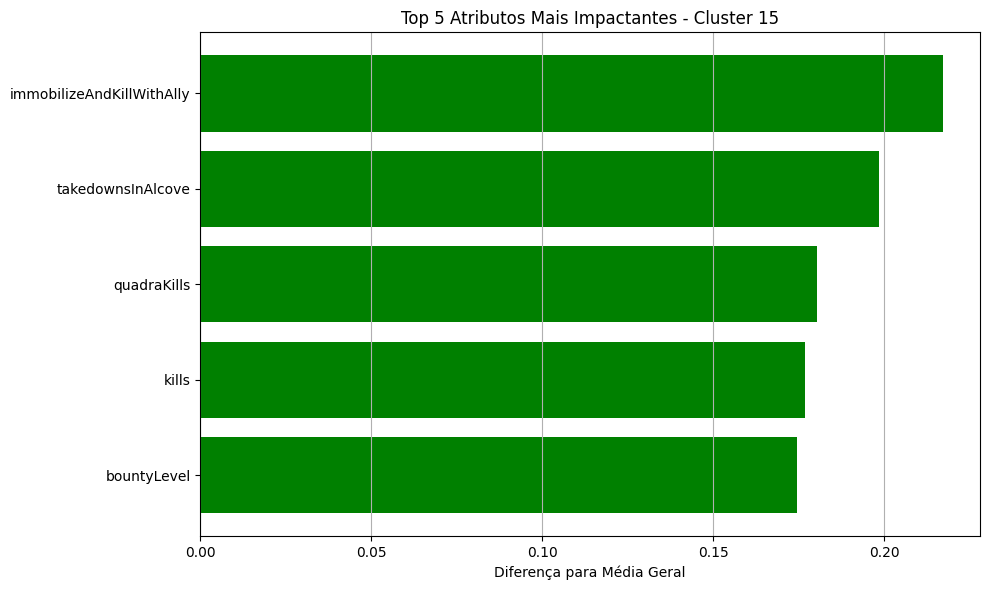

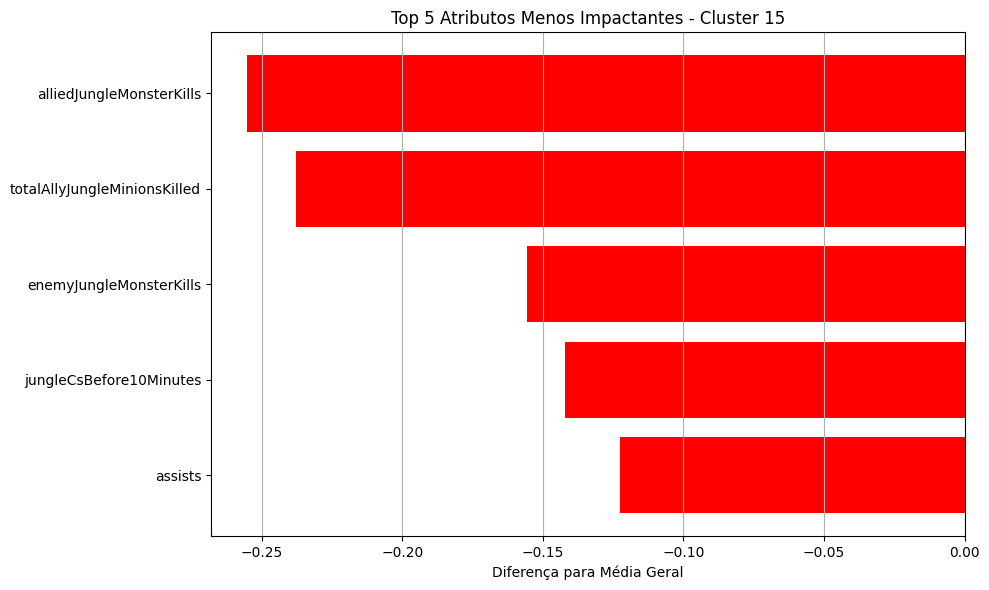

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset correto
win_true_cluster = pd.read_csv('/content/win_false_cluster.csv')

# Variáveis relevantes
variaveis_relevantes = [col for col in win_true_cluster.columns if col not in ['championName', 'cluster']]

# Calcular média geral
media_geral = win_true_cluster[variaveis_relevantes].mean()

# Função para analisar e plotar cada cluster
def analisar_cluster(cluster_num):
    cluster = win_true_cluster[win_true_cluster['cluster'] == cluster_num]
    media_cluster = cluster[variaveis_relevantes].mean()
    diferenca = media_cluster - media_geral

    atributos_mais_impactantes = diferenca[diferenca > 0.10].sort_values(ascending=False)
    atributos_neutros = diferenca[(diferenca >= -0.10) & (diferenca <= 0.10)].sort_values()
    atributos_menos_impactantes = diferenca[diferenca < -0.10].sort_values()

    print(f"\n=== Campeões no Cluster {cluster_num} ===")
    print(cluster['championName'].tolist())

    print(f"\n=== Atributos Mais Impactantes - Cluster {cluster_num} ===")
    print(atributos_mais_impactantes)

    print(f"\n=== Atributos Neutros - Cluster {cluster_num} ===")
    print(atributos_neutros)

    print(f"\n=== Atributos Menos Impactantes - Cluster {cluster_num} ===")
    print(atributos_menos_impactantes)

    top5_positivos = atributos_mais_impactantes.head(5)
    top5_negativos = atributos_menos_impactantes.head(5)

    plt.figure(figsize=(10, 6))
    plt.barh(top5_positivos.index, top5_positivos.values, color='green')
    plt.xlabel('Diferença para Média Geral')
    plt.title(f'Top 5 Atributos Mais Impactantes - Cluster {cluster_num}')
    plt.gca().invert_yaxis()
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.barh(top5_negativos.index, top5_negativos.values, color='red')
    plt.xlabel('Diferença para Média Geral')
    plt.title(f'Top 5 Atributos Menos Impactantes - Cluster {cluster_num}')
    plt.gca().invert_yaxis()
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

# Detectar automaticamente todos os clusters únicos
clusters_unicos = sorted(win_true_cluster['cluster'].unique())

# Rodar a análise para cada cluster encontrado
for cluster_id in clusters_unicos:
    analisar_cluster(cluster_id)


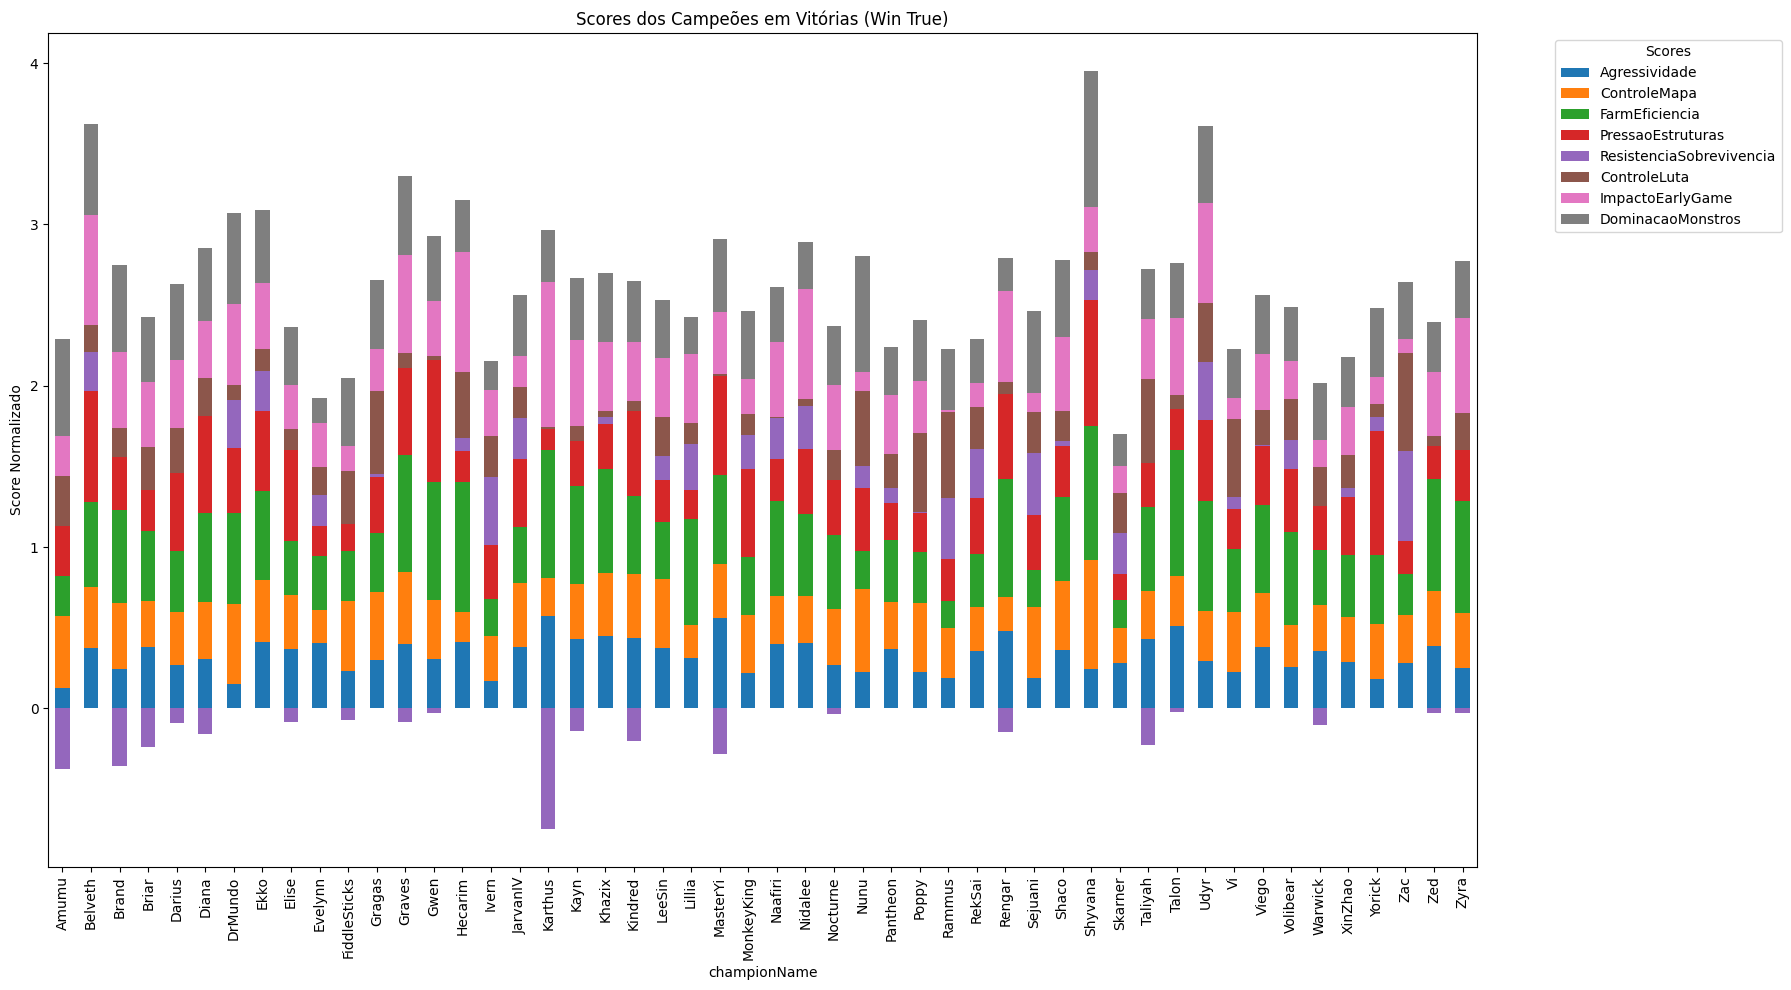

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Carregar os datasets normalizados
win_true = pd.read_csv('/content/win_true_cluster.csv')
win_false = pd.read_csv('/content/win_false_cluster.csv')

# Variáveis usadas para cálculo dos scores
variaveis_relevantes = [
    'kills', 'soloKills', 'damagePerMinute', 'killParticipation', 'killsNearEnemyTurret',
    'killsOnOtherLanesEarlyJungleAsLaner', 'killsUnderOwnTurret', 'quadraKills', 'takedowns',
    'visionScore', 'wardsPlaced', 'wardsKilled', 'controlWardsPlaced', 'objectivesStolen',
    'epicMonsterSteals', 'baronKills', 'dragonTakedowns', 'riftHeraldTakedowns',
    'epicMonsterKillsNearEnemyJungler', 'epicMonsterKillsWithin30SecondsOfSpawn',
    'goldEarned', 'goldPerMinute', 'champExperience', 'jungleCsBefore10Minutes',
    'initialBuffCount', 'initialCrabCount', 'totalAllyJungleMinionsKilled',
    'alliedJungleMonsterKills', 'totalEnemyJungleMinionsKilled', 'enemyJungleMonsterKills',
    'damageDealtToBuildings', 'damageDealtToObjectives', 'turretKills', 'inhibitorKills',
    'turretTakedowns', 'teamRiftHeraldKills', 'teamBaronKills',
    'deaths', 'totalDamageTaken', 'longestTimeSpentLiving', 'survivedSingleDigitHpCount',
    'survivedThreeImmobilizesInFight', 'kda',
    'totalTimeCCDealt', 'enemyChampionImmobilizations', 'immobilizeAndKillWithAlly',
    'knockEnemyIntoTeamAndKill', 'landSkillShotsEarlyGame',
    'earlyLaningPhaseGoldExpAdvantage', 'laningPhaseGoldExpAdvantage',
    'takedownsBeforeJungleMinionSpawn',
    'voidMonsterKill'
]

# Função para calcular os scores
def calcular_scores(df):
    scores = pd.DataFrame()
    scores['championName'] = df['championName']

    scores['Agressividade'] = df[[
        'kills', 'soloKills', 'damagePerMinute', 'killParticipation', 'killsNearEnemyTurret',
        'killsOnOtherLanesEarlyJungleAsLaner', 'killsUnderOwnTurret', 'quadraKills', 'takedowns'
    ]].mean(axis=1)

    scores['ControleMapa'] = df[[
        'visionScore', 'wardsPlaced', 'wardsKilled', 'controlWardsPlaced', 'objectivesStolen',
        'epicMonsterSteals', 'baronKills', 'dragonTakedowns', 'riftHeraldTakedowns',
        'epicMonsterKillsNearEnemyJungler', 'epicMonsterKillsWithin30SecondsOfSpawn'
    ]].mean(axis=1)

    scores['FarmEficiencia'] = df[[
        'goldEarned', 'goldPerMinute', 'champExperience', 'jungleCsBefore10Minutes',
        'initialBuffCount', 'initialCrabCount', 'totalAllyJungleMinionsKilled',
        'alliedJungleMonsterKills', 'totalEnemyJungleMinionsKilled', 'enemyJungleMonsterKills'
    ]].mean(axis=1)

    scores['PressaoEstruturas'] = df[[
        'damageDealtToBuildings', 'damageDealtToObjectives', 'turretKills', 'inhibitorKills',
        'turretTakedowns', 'teamRiftHeraldKills', 'teamBaronKills'
    ]].mean(axis=1)

    scores['ResistenciaSobrevivencia'] = df[[
        'totalDamageTaken', 'longestTimeSpentLiving', 'survivedSingleDigitHpCount',
        'survivedThreeImmobilizesInFight', 'kda'
    ]].mean(axis=1) - df['deaths']

    scores['ControleLuta'] = df[[
        'totalTimeCCDealt', 'enemyChampionImmobilizations', 'immobilizeAndKillWithAlly',
        'knockEnemyIntoTeamAndKill', 'landSkillShotsEarlyGame'
    ]].mean(axis=1)

    scores['ImpactoEarlyGame'] = df[[
        'earlyLaningPhaseGoldExpAdvantage', 'laningPhaseGoldExpAdvantage', 'takedownsBeforeJungleMinionSpawn'
    ]].mean(axis=1)

    scores['DominacaoMonstros'] = df[[
        'voidMonsterKill', 'epicMonsterKillsNearEnemyJungler', 'epicMonsterKillsWithin30SecondsOfSpawn',
        'epicMonsterSteals', 'baronKills', 'dragonTakedowns', 'riftHeraldTakedowns'
    ]].mean(axis=1)

    return scores

# Aplicar função nos dois datasets
scores_win = calcular_scores(win_true)
scores_loss = calcular_scores(win_false)

# Merge para comparação
df_comparacao = pd.merge(scores_win, scores_loss, on='championName', suffixes=('_win', '_loss'))

# Mostrar apenas scores de vitoria (win)
fig, ax = plt.subplots(figsize=(18, 10))
scores_win.set_index('championName').plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Score Normalizado')
ax.set_title('Scores dos Campeões em Vitórias (Win True)')
ax.legend(title='Scores', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Carrega os dois datasets
win_true_cluster = pd.read_csv('/content/win_true_cluster.csv')
win_false_cluster = pd.read_csv('/content/win_false_cluster.csv')

# Lista das variáveis usadas nos Scores
variaveis_relevantes = [
    'kills', 'soloKills', 'damagePerMinute', 'killParticipation', 'killsNearEnemyTurret',
    'killsOnOtherLanesEarlyJungleAsLaner', 'killsUnderOwnTurret', 'quadraKills', 'takedowns',
    'visionScore', 'wardsPlaced', 'wardsKilled', 'controlWardsPlaced', 'objectivesStolen',
    'epicMonsterSteals', 'baronKills', 'dragonTakedowns', 'riftHeraldTakedowns',
    'epicMonsterKillsNearEnemyJungler', 'epicMonsterKillsWithin30SecondsOfSpawn',
    'goldEarned', 'goldPerMinute', 'champExperience', 'jungleCsBefore10Minutes',
    'initialBuffCount', 'initialCrabCount', 'totalAllyJungleMinionsKilled',
    'alliedJungleMonsterKills', 'totalEnemyJungleMinionsKilled', 'enemyJungleMonsterKills',
    'damageDealtToBuildings', 'damageDealtToObjectives', 'turretKills', 'inhibitorKills',
    'turretTakedowns', 'teamRiftHeraldKills', 'teamBaronKills',
    'deaths', 'totalDamageTaken', 'longestTimeSpentLiving', 'survivedSingleDigitHpCount',
    'survivedThreeImmobilizesInFight', 'kda',
    'totalTimeCCDealt', 'enemyChampionImmobilizations', 'immobilizeAndKillWithAlly',
    'knockEnemyIntoTeamAndKill', 'landSkillShotsEarlyGame',
    'earlyLaningPhaseGoldExpAdvantage', 'laningPhaseGoldExpAdvantage',
    'takedownsBeforeJungleMinionSpawn',
    'voidMonsterKill'
]

# Define função de cálculo dos 8 Scores

def calcular_scores(df):
    scores = pd.DataFrame()
    scores['Agressividade'] = df[[
        'kills', 'soloKills', 'damagePerMinute', 'killParticipation', 'killsNearEnemyTurret',
        'killsOnOtherLanesEarlyJungleAsLaner', 'killsUnderOwnTurret', 'quadraKills', 'takedowns'
    ]].mean(axis=1)

    scores['Controle de Mapa'] = df[[
        'visionScore', 'wardsPlaced', 'wardsKilled', 'controlWardsPlaced', 'objectivesStolen',
        'epicMonsterSteals', 'baronKills', 'dragonTakedowns', 'riftHeraldTakedowns',
        'epicMonsterKillsNearEnemyJungler', 'epicMonsterKillsWithin30SecondsOfSpawn'
    ]].mean(axis=1)

    scores['Eficiência de Recursos'] = df[[
        'goldEarned', 'goldPerMinute', 'champExperience', 'jungleCsBefore10Minutes',
        'initialBuffCount', 'initialCrabCount', 'totalAllyJungleMinionsKilled',
        'alliedJungleMonsterKills', 'totalEnemyJungleMinionsKilled', 'enemyJungleMonsterKills'
    ]].mean(axis=1)

    scores['Pressão em Estruturas'] = df[[
        'damageDealtToBuildings', 'damageDealtToObjectives', 'turretKills', 'inhibitorKills',
        'turretTakedowns', 'teamRiftHeraldKills', 'teamBaronKills'
    ]].mean(axis=1)

    scores['Sustentação e Sobrevivência'] = df[[
        'totalDamageTaken', 'longestTimeSpentLiving', 'survivedSingleDigitHpCount',
        'survivedThreeImmobilizesInFight', 'kda'
    ]].mean(axis=1) - df['deaths']

    scores['Impacto Utilitário'] = df[[
        'totalTimeCCDealt', 'enemyChampionImmobilizations', 'immobilizeAndKillWithAlly',
        'knockEnemyIntoTeamAndKill', 'landSkillShotsEarlyGame'
    ]].mean(axis=1)

    scores['Impacto no Early Game'] = df[[
        'earlyLaningPhaseGoldExpAdvantage', 'laningPhaseGoldExpAdvantage', 'takedownsBeforeJungleMinionSpawn'
    ]].mean(axis=1)

    scores['Controle de Objetivos'] = df[[
        'voidMonsterKill', 'epicMonsterKillsNearEnemyJungler', 'epicMonsterKillsWithin30SecondsOfSpawn',
        'epicMonsterSteals', 'baronKills', 'dragonTakedowns', 'riftHeraldTakedowns'
    ]].mean(axis=1)

    return scores

# Calcula os scores individuais
scores_true = calcular_scores(win_true_cluster)
scores_false = calcular_scores(win_false_cluster)

# Adiciona os nomes dos campeões
scores_true['championName'] = win_true_cluster['championName']
scores_false['championName'] = win_false_cluster['championName']

# Agrupa por campeão para tirar a média
scores_campeoes_win = scores_true.groupby('championName').mean()
scores_campeoes_lose = scores_false.groupby('championName').mean()

# Exibe uma amostra
print(scores_campeoes_win.head())
print(scores_campeoes_lose.head())

# (Opcional) Salva para uso futuro
scores_campeoes_win.to_csv('/content/scores_campeoes_win.csv')
scores_campeoes_lose.to_csv('/content/scores_campeoes_lose.csv')


              Agressividade  Controle de Mapa  Eficiência de Recursos  \
championName                                                            
Amumu              0.126963          0.443929                0.247274   
Belveth            0.374086          0.377717                0.526757   
Brand              0.243011          0.411265                0.574786   
Briar              0.379563          0.287488                0.431494   
Darius             0.271522          0.322943                0.380125   

              Pressão em Estruturas  Sustentação e Sobrevivência  \
championName                                                       
Amumu                      0.312807                    -0.373016   
Belveth                    0.691677                     0.236504   
Brand                      0.330540                    -0.355866   
Briar                      0.257567                    -0.237661   
Darius                     0.482448                    -0.089596   

           